<a href="https://colab.research.google.com/github/ShanzidaZaman/Learning-web--technologies-fall2024--2025-sec-c/blob/main/Copy_of_CKD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cs piv na re pi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import scipy
import time

from imblearn.over_sampling import SMOTE
from collections import Counter
import itertools

from sklearn.tree import DecisionTreeClassifier
from scipy.stats import pearsonr
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import chi2_contingency
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense,Dropout,Activation,BatchNormalization
from scikeras import wrappers
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_curve, auc as auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import cross_val_score,cross_val_predict, cross_validate
from sklearn.metrics import make_scorer,precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier

ModuleNotFoundError: No module named 'scikeras'

In [ ]:
data = pd.read_csv(r'C:\Users\Jeff\Desktop\4001\new_model.csv')
np.random.seed(42)
random_state = 42

In [ ]:
display(data)

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,80.0,1.020,0.0,0.0,1.0,49.0,0.5,150.00,4.90,15.7,6700.0,4.90,0.0,0
396,70.0,1.025,0.0,0.0,1.0,31.0,1.2,141.00,3.50,16.5,7800.0,6.20,0.0,0
397,80.0,1.020,0.0,0.0,1.0,26.0,0.6,137.00,4.40,15.8,6600.0,5.40,0.0,0
398,60.0,1.025,0.0,0.0,1.0,50.0,1.0,135.00,4.90,14.2,7200.0,5.90,0.0,0


There are 250 cdk records and 150 non-cdk records in the dataset

Here we use SMOTE to balance class

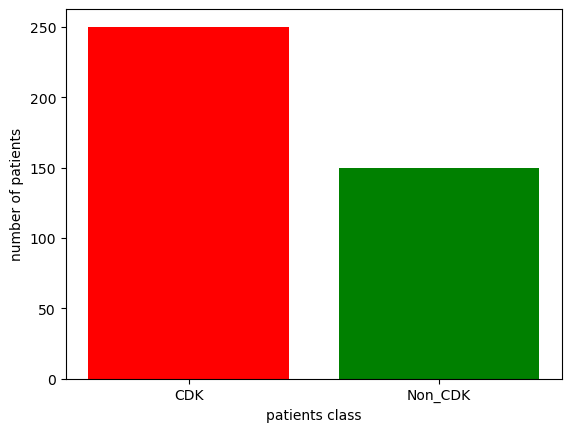

In [ ]:
array = data.to_numpy()
cdk = 0
non_cdk = 0
for i in array:
    if i[13] == 1:
        cdk += 1
    else:
        non_cdk += 1

# x-coordinates of left sides of bars
x = ["CDK","Non_CDK"]

# heights of bars
y = [cdk, non_cdk]

# labels for bars
label = ['CDK', 'Non_CDK']

# plotting a bar chart
plt.bar(x,y, tick_label = label,
        width = 0.8, color = ['red', 'green'])

# naming the x-axis
plt.xlabel('patients class')
# naming the y-axis
plt.ylabel('number of patients')

# function to show the plot
plt.show()

Here we use SMOTE to balance class

In [ ]:
X = array[:,:13]
y = array[:,13]
sm = SMOTE(k_neighbors=5)
X_res, y_res = sm.fit_resample(X, y)
bal_array = np.hstack((X_res, np.atleast_2d(y_res).T))
bal_data = pd.DataFrame(bal_array,columns=data.columns.values)

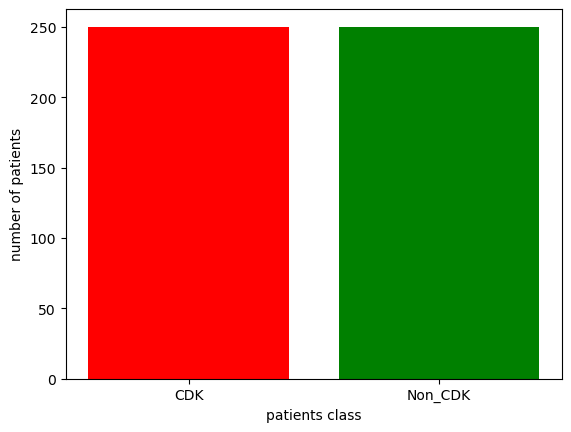

In [ ]:
cdk = 0
non_cdk = 0
for i in bal_array:
    if i[13] == 1:
        cdk += 1
    else:
        non_cdk += 1

# x-coordinates of left sides of bars
x = ["CDK","Non_CDK"]

# heights of bars
y = [cdk, non_cdk]

# labels for bars
label = ['CDK', 'Non_CDK']

# plotting a bar chart
plt.bar(x,y, tick_label = label,
        width = 0.8, color = ['red', 'green'])

# naming the x-axis
plt.xlabel('patients class')
# naming the y-axis
plt.ylabel('number of patients')

# function to show the plot
plt.show()

# Ranking

In [ ]:
max = X_res.max(axis=0, keepdims=True)
min = X_res.min(axis=0, keepdims=True)
mean = X_res.mean(axis=0, keepdims=True).round(decimals=2).astype('str')
mean = np.char.rjust(mean,5)
mean_sym = np.core.defchararray.add( mean,u" \u00B1")
std = X_res.std(axis=0, keepdims=True).astype('str')
std =np.char.rjust(std,5)
mean_std = np.core.defchararray.add( mean_sym,std)


features =bal_data.iloc[:, :-1]
class_variable = bal_data.iloc[:, -1]

In [ ]:
stat = np.concatenate((min, max,mean_std), axis=0)
stat_data =  pd.DataFrame(stat,columns=data.columns.values[:13])
stat_data.index = ['min', 'max', 'mean \u00B1 std']
display(stat_data.T)

,min,max,mean ± std
Bp,50.0,180.0,75.66 ±12.58
Sg,1.005,1.025,1.02 ±0.005
Al,0.0,5.0,0.82 ±1.204
Su,0.0,5.0,0.32 ±0.942
Rbc,0.0,1.0,0.91 ±0.291
Bu,1.5,391.0,52.45 ±45.37
Sc,0.4,76.0,2.64 ±5.095
Sod,4.5,163.0,138.1 ±8.510
Pot,2.5,47.0,4.57 ±2.528
Hemo,3.1,17.8,13.02 ±2.669


### Random Forest

In [ ]:
correlation_coefficients = []
p_values = []

### Random Forest
for column in features.columns:
    correlation_coefficient, p_value = pearsonr(features[column], class_variable)
    correlation_coefficients.append(round(correlation_coefficient, 4))
    p_values.append(p_value)

correlation_results = pd.DataFrame({
    "Feature": features.columns,
    "CC": correlation_coefficients,
    "P-value": p_values,
})

correlation_results = correlation_results.sort_values(
    by="CC", key=abs, ascending=False
)

# Print the results without row names
print(correlation_results.to_string(index=False))

Feature      CC      P-value
   Hemo -0.7574 3.006493e-94
     Sg -0.7087 1.760604e-77
     Al  0.6529 4.607550e-62
    Htn  0.6409 3.473265e-59
   Rbcc -0.6114 1.394483e-52
     Bu  0.4218 5.525200e-23
    Sod -0.3638 4.294680e-17
     Sc  0.3360 1.162628e-14
     Su  0.3353 1.328117e-14
    Rbc -0.3221 1.557516e-13
     Bp  0.3032 4.342738e-12
   Wbcc  0.2148 1.252576e-06
    Pot  0.0896 4.530268e-02


### Gain ratio

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_classifier = DecisionTreeClassifier(
    max_depth=None, min_samples_split=2, min_impurity_decrease=0.001,random_state = random_state)

tree_classifier.fit(features, class_variable)

feature_importances = tree_classifier.feature_importances_

feature_importance_results = pd.DataFrame({
    "Feature": features.columns,
    "gain ratio": feature_importances
})

feature_importance_results = feature_importance_results.sort_values(
    by="gain ratio", ascending=False
)

print(feature_importance_results)

   Feature  gain ratio
9     Hemo    0.761642
1       Sg    0.173042
11    Rbcc    0.029348
12     Htn    0.024087
5       Bu    0.011882
0       Bp    0.000000
2       Al    0.000000
3       Su    0.000000
4      Rbc    0.000000
6       Sc    0.000000
7      Sod    0.000000
8      Pot    0.000000
10    Wbcc    0.000000


### pearson CC

In [ ]:
correlation_coefficients = []
p_values = []

for column in features.columns:
    correlation_coefficient, p_value = pearsonr(features[column], class_variable)
    correlation_coefficients.append(round(correlation_coefficient, 4))
    p_values.append(p_value)

correlation_results = pd.DataFrame({
    "Feature": features.columns,
    "CC": correlation_coefficients,
    "P-value": p_values,
})

correlation_results = correlation_results.sort_values(
    by="CC", key=abs, ascending=False
)

# Print the results without row names
print(correlation_results.to_string(index=False))

Feature      CC      P-value
   Hemo -0.7574 3.006493e-94
     Sg -0.7087 1.760604e-77
     Al  0.6529 4.607550e-62
    Htn  0.6409 3.473265e-59
   Rbcc -0.6114 1.394483e-52
     Bu  0.4218 5.525200e-23
    Sod -0.3638 4.294680e-17
     Sc  0.3360 1.162628e-14
     Su  0.3353 1.328117e-14
    Rbc -0.3221 1.557516e-13
     Bp  0.3032 4.342738e-12
   Wbcc  0.2148 1.252576e-06
    Pot  0.0896 4.530268e-02


### Chi-Square Test

In [ ]:
chi2_statistics = []
p_values = []

for column in features.columns:
    contingency_table = pd.crosstab(features[column], class_variable)
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi2_statistics.append(chi2)
    p_values.append(p)

feature_importance = pd.DataFrame({
    'Feature': features.columns,
    'Chi2_Statistic': chi2_statistics,
    'P_Value': p_values
})


feature_importance = feature_importance.sort_values(by='Chi2_Statistic', ascending=False)

print(feature_importance)

   Feature  Chi2_Statistic       P_Value
9     Hemo      411.331136  3.454521e-15
11    Rbcc      369.046887  7.521031e-24
6       Sc      354.416164  2.036800e-14
2       Al      304.784580  1.513505e-59
1       Sg      290.905747  3.471612e-34
7      Sod      283.388839  1.945788e-15
8      Pot      277.206907  2.367034e-12
5       Bu      262.796465  1.444578e-02
10    Wbcc      224.225325  2.867817e-06
12     Htn      209.942529  2.116994e-43
0       Bp      187.614517  3.888151e-13
3       Su       69.476082  1.317185e-13
4      Rbc       49.692358  1.798450e-12


## Machine Learning models

Defined a function to draw plots

In [ ]:
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):

    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2), len(grid_param_1))

    # Find the indices of the maximum value in the scores_mean array
    max_idx = np.unravel_index(np.argmax(scores_mean), scores_mean.shape)
    max_x = grid_param_1[max_idx[1]]
    max_y = scores_mean[max_idx]

    offset = 0.001

    _, ax = plt.subplots(1, 1)

    for idx, val in enumerate(grid_param_2):
        x_values = [x + idx * offset for x in grid_param_1]
        ax.plot(x_values, scores_mean[idx, :], '-o', label=name_param_2 + ': ' + str(val))

    ax.set_title("Grid Search Scores", fontsize=14, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=13)
    ax.set_ylabel('CV Average Score', fontsize=13)
    ax.grid(True)
    ax.set_xticks(grid_param_1)

    plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
    ax.text(max_x, max_y, f'{max_y:.4f}', ha='center', va='bottom')

    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.tight_layout()
    plt.show()

In [ ]:
#balanced data
features =bal_data.iloc[:, :-1]
class_variable = bal_data.iloc[:, -1]

#unbalanced data
X = array[:,:13]
y = array[:,13]
unbal_array = np.hstack((X, np.atleast_2d(y).T))
unbal_data = pd.DataFrame(unbal_array,columns=data.columns.values)
un_features =unbal_data.iloc[:, :-1]
un_class_variable = unbal_data.iloc[:, -1]

### NB

In [ ]:
def nbClassifier(X, y):
    nb = GaussianNB()

    scoring = {
        'accuracy': 'accuracy',
        'precision': make_scorer(precision_score),
        'recall': make_scorer(recall_score),
        'f1': make_scorer(f1_score),
        'roc_auc': make_scorer(roc_auc_score)
    }

    start_time = time.time()
    scores = cross_validate(nb, X, y, cv=10, scoring=scoring, return_train_score=True)
    end_time = time.time()

    training_time = np.mean(scores['fit_time'])
    testing_time = np.mean(scores['score_time'])

    results = {
       'accuracy_mean': np.mean(scores['test_accuracy']),
        'accuracy_std': np.std(scores['test_accuracy']),
        'precision_mean': np.mean(scores['test_precision']),
        'precision_std': np.std(scores['test_precision']),
        'recall_mean': np.mean(scores['test_recall']),
        'recall_std': np.std(scores['test_recall']),
        'f1_mean': np.mean(scores['test_f1']),
        'f1_std': np.std(scores['test_f1']),
        'roc_auc_mean': np.mean(scores['test_roc_auc']),
        'roc_auc_std': np.std(scores['test_roc_auc']),
        'training_time': training_time,
        'testing_time': testing_time
    }

    return results

In [ ]:
results = nbClassifier(features, class_variable)

In [ ]:

print("Performance Metrics:")
print("Accuracy: Mean = {:.3f}, StdDev = {:.3f}".format(results['accuracy_mean'], results['accuracy_std']))
print("Precision: Mean = {:.3f}, StdDev = {:.3f}".format(results['precision_mean'], results['precision_std']))
print("Recall: Mean = {:.3f}, StdDev = {:.3f}".format(results['recall_mean'], results['recall_std']))
print("F1 Score: Mean = {:.3f}, StdDev = {:.3f}".format(results['f1_mean'], results['f1_std']))
print("ROC AUC: Mean = {:.3f}, StdDev = {:.3f}".format(results['roc_auc_mean'], results['roc_auc_std']))
print("Training Time: {:.3f} seconds".format(results['training_time']))
print("Testing Time: {:.3f} seconds".format(results['testing_time']))


# results_unbal = nbClassifier(un_features, un_class_variable)
# print("\nNB average cross-validation metrics on unbalanced data:")
# print("Accuracy: {:.4f}".format(results_unbal['accuracy']))
# print("Precision: {:.4f}".format(results_unbal['precision']))
# print("Recall: {:.4f}".format(results_unbal['recall']))
# print("F-Measure: {:.4f}".format(results_unbal['f_measure']))
# print("AUC: {:.4f}".format(results_unbal['auc']))

Performance Metrics:
Accuracy: Mean = 0.950, StdDev = 0.042
Precision: Mean = 1.000, StdDev = 0.000
Recall: Mean = 0.900, StdDev = 0.084
F1 Score: Mean = 0.945, StdDev = 0.050
ROC AUC: Mean = 0.950, StdDev = 0.042
Training Time: 0.002 seconds
Testing Time: 0.007 seconds


### KNN

In [ ]:
def kNNClassifier(X, y, k, random_state=42):
    scaler = MinMaxScaler()
    knn = KNeighborsClassifier(n_neighbors=k)

    X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size=0.2, random_state=random_state)

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    start_train_time = time.time()
    knn.fit(X_train, y_train)
    end_train_time = time.time()
    training_time = (end_train_time - start_train_time)

    X_scaled = scaler.transform(X)

    scoring = {
        'accuracy': 'accuracy',
        'precision': make_scorer(precision_score),
        'recall': make_scorer(recall_score),
        'f1': make_scorer(f1_score),
        'roc_auc': make_scorer(roc_auc_score)
    }

    start_cv_time = time.time()
    scores = cross_validate(knn, X_scaled, y, cv=10, scoring=scoring, return_train_score=True)
    end_cv_time = time.time()

    testing_time = (end_cv_time - start_cv_time)

    results = {
        'accuracy_mean': np.mean(scores['test_accuracy']),
        'accuracy_std': np.std(scores['test_accuracy']),
        'precision_mean': np.mean(scores['test_precision']),
        'precision_std': np.std(scores['test_precision']),
        'recall_mean': np.mean(scores['test_recall']),
        'recall_std': np.std(scores['test_recall']),
        'f1_mean': np.mean(scores['test_f1']),
        'f1_std': np.std(scores['test_f1']),
        'roc_auc_mean': np.mean(scores['test_roc_auc']),
        'roc_auc_std': np.std(scores['test_roc_auc']),
        'training_time_ms': training_time,
        'testing_time_ms': testing_time
    }

    return results

In [ ]:
neighbors = np.arange(1, 9)
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    test_accuracy[i] =kNNClassifier(feature_scaled,class_variable,k)['accuracy_mean']

results = kNNClassifier(feature_scaled,class_variable,3)
print("Performance Metrics with kNN Classifier (k = {}):".format(k))
print("Accuracy: Mean = {:.3f}, StdDev = {:.3f}".format(results['accuracy_mean'], results['accuracy_std']))
print("Precision: Mean = {:.3f}, StdDev = {:.3f}".format(results['precision_mean'], results['precision_std']))
print("Recall: Mean = {:.3f}, StdDev = {:.3f}".format(results['recall_mean'], results['recall_std']))
print("F1 Score: Mean = {:.3f}, StdDev = {:.3f}".format(results['f1_mean'], results['f1_std']))
print("ROC AUC: Mean = {:.3f}, StdDev = {:.3f}".format(results['roc_auc_mean'], results['roc_auc_std']))
print("Training Time: {:.3f} seconds".format(results['training_time_ms']))
print("Cross-Validation Time: {:.3f} seconds".format(results['testing_time_ms']))
print("Training time: {:.4f}".format(results['training_time_ms']))
print("Testing time: {:.4f}".format(results['testing_time_ms']))


for i, k in enumerate(neighbors):
    test_accuracy[i] =kNNClassifier(un_features, un_class_variable,k)['accuracy_mean']

print("\nKNN average cross-validation metrics on imbalanced data:")
print(np.max(test_accuracy))

Performance Metrics with kNN Classifier (k = 8):
Accuracy: Mean = 0.992, StdDev = 0.010
Precision: Mean = 0.996, StdDev = 0.012
Recall: Mean = 0.988, StdDev = 0.018
F1 Score: Mean = 0.992, StdDev = 0.010
ROC AUC: Mean = 0.992, StdDev = 0.010
Training Time: 0.002 seconds
Cross-Validation Time: 0.382 seconds
Training time: 0.0015
Testing time: 0.3821

KNN average cross-validation metrics on imbalanced data:
0.985


### RF

In [ ]:
from sklearn.metrics import classification_report
max_depth = [1,2,3,4,5]
n_estimators = [10, 20, 30, 50, 100]

def bestRFClassifier(X, y, max_depth, n_estimators):


    X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, random_state=0)

    param_grid_forest = {'max_depth': max_depth, 'n_estimators': n_estimators}

    start_time = time.time()
    grid_search_rf = GridSearchCV(RandomForestClassifier(criterion='entropy', random_state=42),
                                  param_grid_forest, cv=10, return_train_score=True)
    grid_search_rf.fit(X_train, y_train)
    end_time = time.time()

    training_time = (end_time - start_time)
    print(training_time)

    best_params = grid_search_rf.best_params_
    print( best_params)
    best_cv_accuracy = grid_search_rf.best_score_
    print("Best cross-validation accuracy:", best_cv_accuracy)

    return grid_search_rf.cv_results_

In [ ]:
return_dic = bestRFClassifier(features, class_variable,max_depth,n_estimators)

17.057511568069458
{'max_depth': 5, 'n_estimators': 20}
Best cross-validation accuracy: 0.9973684210526315


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, class_variable, random_state=0)
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

rf_classifier = RandomForestClassifier(max_depth=5, n_estimators=20)
rf_classifier.fit(X_train, y_train)

kf = KFold(n_splits=10, shuffle=True, random_state=0)
cv_scores = []
precisions = []
recalls = []
f1_scores = []
auc_scores = []
test_times = []

for train_index, test_index in kf.split(X_train):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    rf_classifier.fit(X_train_fold, y_train_fold)

    start_time = time.time()
    y_pred_fold = rf_classifier.predict(X_test_fold)
    y_pred_proba_fold = rf_classifier.predict_proba(X_test_fold)[:, 1]  # Probability estimates needed for AUC
    end_time = time.time()

    cv_scores.append(rf_classifier.score(X_test_fold, y_test_fold))
    precisions.append(precision_score(y_test_fold, y_pred_fold))
    recalls.append(recall_score(y_test_fold, y_pred_fold))
    f1_scores.append(f1_score(y_test_fold, y_pred_fold))
    auc_scores.append(roc_auc_score(y_test_fold, y_pred_proba_fold))
    test_times.append(end_time - start_time)

average_accuracy = np.mean(cv_scores)
std_dev_accuracy = np.std(cv_scores)
average_precision = np.mean(precisions)
std_dev_precision = np.std(precisions)
average_recall = np.mean(recalls)
std_dev_recall = np.std(recalls)
average_f1 = np.mean(f1_scores)
std_dev_f1 = np.std(f1_scores)
average_auc = np.mean(auc_scores)
std_dev_auc = np.std(auc_scores)
average_testing_time = np.mean(test_times)

print("Performance Metrics with Random Forest Classifier:")
print(f"Average CV Accuracy: {average_accuracy:.3f}, StdDev: {std_dev_accuracy:.3f}")
print(f"Average CV Precision: {average_precision:.3f}, StdDev: {std_dev_precision:.3f}")
print(f"Average CV Recall: {average_recall:.3f}, StdDev: {std_dev_recall:.3f}")
print(f"Average CV F1 Score: {average_f1:.3f}, StdDev: {std_dev_f1:.3f}")
print(f"Average CV AUC: {average_auc:.3f}, StdDev: {std_dev_auc:.3f}")
print(f"Average Testing Time: {average_testing_time:.3f} seconds")

Performance Metrics with Random Forest Classifier:
Average CV Accuracy: 0.981, StdDev: 0.024
Average CV Precision: 0.986, StdDev: 0.030
Average CV Recall: 0.981, StdDev: 0.031
Average CV F1 Score: 0.983, StdDev: 0.022
Average CV AUC: 1.000, StdDev: 0.001
Average Testing Time: 0.006 seconds


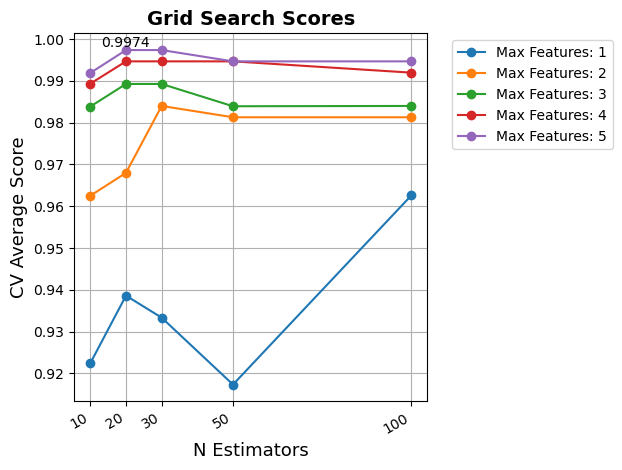

In [ ]:
plot_grid_search(return_dic, n_estimators, max_depth, 'N Estimators', 'Max Features')

In [ ]:
return_dic_un = bestRFClassifier(un_features, un_class_variable,max_depth,n_estimators)

17.75104594230652
0.006000041961669922
{'max_depth': 5, 'n_estimators': 50}
Best cross-validation accuracy: 0.9933333333333334
Cross-validation error: 0.006666666666666599


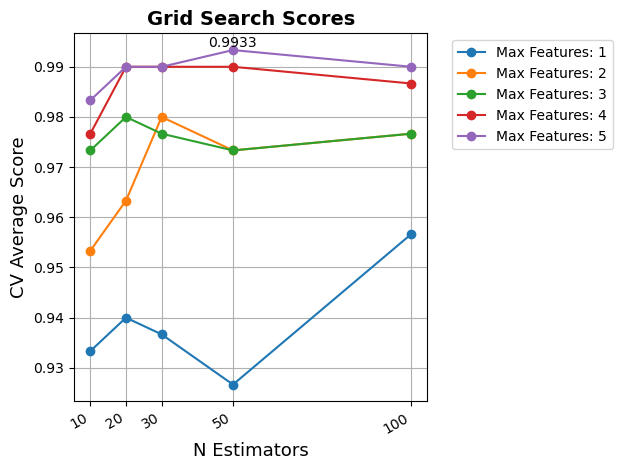

In [ ]:
plot_grid_search(return_dic_un, n_estimators, max_depth, 'N Estimators', 'Max Features')

### SVM

In [ ]:
gamma = [0.001, 0.01, 0.1, 1, 10, 100]
C = [0.001, 0.01, 0.1]

def bestLinClassifier2(X,y,C,gamma):
    X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=0)

    scaler = StandardScaler()
#   scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    parameters = {'C': C, 'gamma': gamma}
    svc = svm.SVC(kernel='linear')

    start_time = time.time()
    clf = GridSearchCV(svc, parameters,cv=10,return_train_score=True)
    clf.fit(X_train,y_train)
    end_time = time.time()
    print(end_time-start_time)

    best_params = clf.best_params_
    print("Best parameters:", best_params)

    best_cv_accuracy = clf.best_score_
    print("Best accuracy:", best_cv_accuracy)

    return clf.cv_results_

In [ ]:
SVC_result = bestLinClassifier2(features, class_variable,C,gamma)

1.0289969444274902
Best parameters: {'C': 0.1, 'gamma': 0.001}
Best accuracy: 0.9866287339971551


In [ ]:
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features_scaled, class_variable, random_state=0)

svm_classifier = SVC(C=0.1, gamma=0.001, probability=True)
kf = KFold(n_splits=10, shuffle=True, random_state=0)
cv_scores = []
precisions = []
recalls = []
f1_scores = []
auc_scores = []
test_times = []

for train_index, test_index in kf.split(X_train):
    X_train_fold = X_train[train_index]
    X_test_fold = X_train[test_index]
    y_train_fold = y_train.iloc[train_index]
    y_test_fold = y_train.iloc[test_index]

    svm_classifier.fit(X_train_fold, y_train_fold)

    start_time = time.time()
    y_pred_fold = svm_classifier.predict(X_test_fold)
    y_pred_proba_fold = svm_classifier.predict_proba(X_test_fold)[:, 1]
    end_time = time.time()

    cv_scores.append(svm_classifier.score(X_test_fold, y_test_fold))
    precisions.append(precision_score(y_test_fold, y_pred_fold, zero_division=0))
    recalls.append(recall_score(y_test_fold, y_pred_fold))
    f1_scores.append(f1_score(y_test_fold, y_pred_fold, zero_division=0))
    auc_scores.append(roc_auc_score(y_test_fold, y_pred_proba_fold))
    test_times.append(end_time - start_time)

average_accuracy = np.mean(cv_scores)
std_dev_accuracy = np.std(cv_scores)
average_precision = np.mean(precisions)
std_dev_precision = np.std(precisions)
average_recall = np.mean(recalls)
std_dev_recall = np.std(recalls)
average_f1 = np.mean(f1_scores)
std_dev_f1 = np.std(f1_scores)
average_auc = np.mean(auc_scores)
std_dev_auc = np.std(auc_scores)
average_testing_time = np.mean(test_times)

print("Performance Metrics with SVM Classifier:")
print(f"Average CV Accuracy: {average_accuracy:.3f}, StdDev: {std_dev_accuracy:.3f}")
print(f"Average CV Precision: {average_precision:.3f}, StdDev: {std_dev_precision:.3f}")
print(f"Average CV Recall: {average_recall:.3f}, StdDev: {std_dev_recall:.3f}")
print(f"Average CV F1 Score: {average_f1:.3f}, StdDev: {std_dev_f1:.3f}")
print(f"Average CV AUC: {average_auc:.3f}, StdDev: {std_dev_auc:.3f}")
print(f"Average Testing Time: {average_testing_time:.3f} seconds")

Performance Metrics with SVM Classifier:
Average CV Accuracy: 0.451, StdDev: 0.034
Average CV Precision: 0.276, StdDev: 0.227
Average CV Recall: 0.600, StdDev: 0.490
Average CV F1 Score: 0.377, StdDev: 0.309
Average CV AUC: 0.101, StdDev: 0.199
Average Testing Time: 0.003 seconds


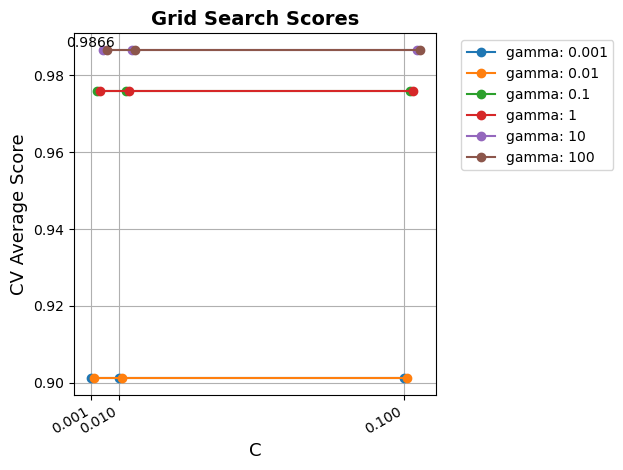

In [ ]:
plot_grid_search(SVC_result, C, gamma, 'C', 'gamma')

In [ ]:
SVC_result_un = bestLinClassifier2(un_features, un_class_variable,C,gamma)

Best parameters: {'C': 0.1, 'gamma': 0.001}
Best cross-validation accuracy: 0.9800000000000001
Cross-validation error: 0.019999999999999907


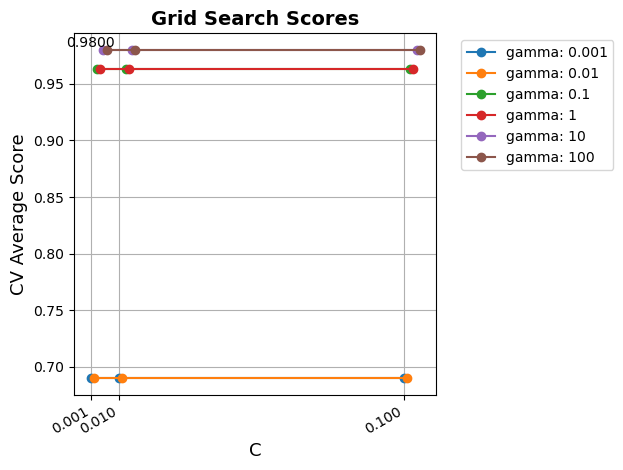

In [ ]:
plot_grid_search(SVC_result_un, C, gamma, 'C', 'gamma')

### DT

In [ ]:
max_depth = [1,2,3,4,5]
max_features = [1,2,3,4,5]

def bestDTClassifier(X, y, max_depth, max_features):
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)
    scaler =StandardScaler()

    # Scale the training data and transform the test data
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)


    param_grid_DT = {'max_depth': max_depth, 'max_features': max_features}

    start_time = time.time()
    grid_search_DT = GridSearchCV(DecisionTreeClassifier(criterion='entropy', random_state=0), param_grid_DT, cv=10, return_train_score=True)
    grid_search_DT.fit(X_train, y_train)
    end_time = time.time()
    print(end_time-start_time)

    y_pred = grid_search_DT.predict(X_test)
    y_prob = grid_search_DT.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

    best_params = grid_search_DT.best_params_
    print("Best parameters:", best_params)

    best_cv_accuracy = grid_search_DT.best_score_
    print("Best cross-validation accuracy:", best_cv_accuracy)

    cv_error = 1 - best_cv_accuracy
    print("Cross-validation error:", cv_error)

    return grid_search_DT.cv_results_

In [ ]:
DT_result = bestDTClassifier(features, class_variable,max_depth,max_features)

0.6890475749969482
Best parameters: {'max_depth': 4, 'max_features': 5}
Best cross-validation accuracy: 0.9839971550497868
Cross-validation error: 0.016002844950213202


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, class_variable, random_state=0)

dt_classifier = DecisionTreeClassifier(max_depth=4, max_features=5)
dt_classifier.fit(X_train, y_train)

kf = KFold(n_splits=10, shuffle=True, random_state=0)
cv_scores = []
precisions = []
recalls = []
f1_scores = []
auc_scores = []
test_times = []

for train_index, test_index in kf.split(X_train):
    X_train_fold = X_train.iloc[train_index]
    X_test_fold = X_train.iloc[test_index]
    y_train_fold = y_train.iloc[train_index]
    y_test_fold = y_train.iloc[test_index]

    dt_classifier.fit(X_train_fold, y_train_fold)

    start_time = time.time()
    y_pred_fold = dt_classifier.predict(X_test_fold)
    end_time = time.time()

    score = dt_classifier.score(X_test_fold, y_test_fold)
    precision = precision_score(y_test_fold, y_pred_fold, zero_division=0)
    recall = recall_score(y_test_fold, y_pred_fold)
    f1 = f1_score(y_test_fold, y_pred_fold, zero_division=0)

    cv_scores.append(score)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    test_times.append(end_time - start_time)

    if hasattr(dt_classifier, "predict_proba"):
        y_pred_proba_fold = dt_classifier.predict_proba(X_test_fold)[:, 1]
        auc_score = roc_auc_score(y_test_fold, y_pred_proba_fold)
        auc_scores.append(auc_score)

average_accuracy = np.mean(cv_scores)
std_dev_accuracy = np.std(cv_scores)
average_precision = np.mean(precisions)
std_dev_precision = np.std(precisions)
average_recall = np.mean(recalls)
std_dev_recall = np.std(recalls)
average_f1 = np.mean(f1_scores)
std_dev_f1 = np.std(f1_scores)
average_testing_time = np.mean(test_times)

print("Performance Metrics with Decision Tree Classifier:")
print(f"Average CV Accuracy: {average_accuracy:.3f}, StdDev: {std_dev_accuracy:.3f}")
print(f"Average CV Precision: {average_precision:.3f}, StdDev: {std_dev_precision:.3f}")
print(f"Average CV Recall: {average_recall:.3f}, StdDev: {std_dev_recall:.3f}")
print(f"Average CV F1 Score: {average_f1:.3f}, StdDev: {std_dev_f1:.3f}")
print(f"Average Testing Time: {average_testing_time:.3f} seconds")

if auc_scores:
    average_auc = np.mean(auc_scores)
    std_dev_auc = np.std(auc_scores)
    print(f"Average CV AUC: {average_auc:.3f}, StdDev: {std_dev_auc:.3f}")

Performance Metrics with Decision Tree Classifier:
Average CV Accuracy: 0.974, StdDev: 0.039
Average CV Precision: 0.974, StdDev: 0.026
Average CV Recall: 0.977, StdDev: 0.053
Average CV F1 Score: 0.975, StdDev: 0.035
Average Testing Time: 0.001 seconds
Average CV AUC: 0.976, StdDev: 0.050


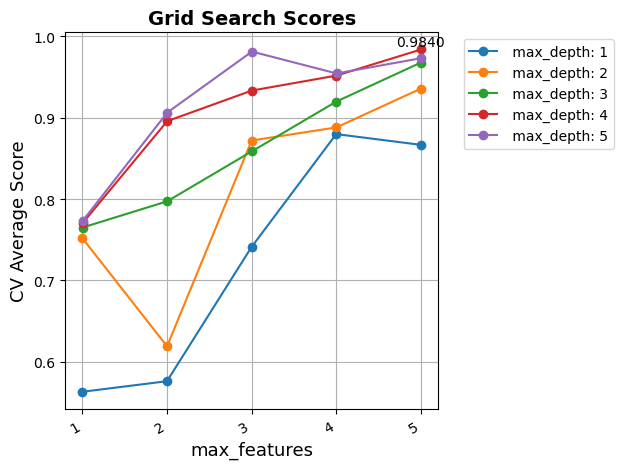

In [ ]:
plot_grid_search(DT_result,max_features, max_depth, 'max_features', ' max_depth')

Accuracy: 0.96
Precision: 0.967741935483871
Recall: 0.967741935483871
F-Measure: 0.967741935483871
AUC: 0.9622241086587437


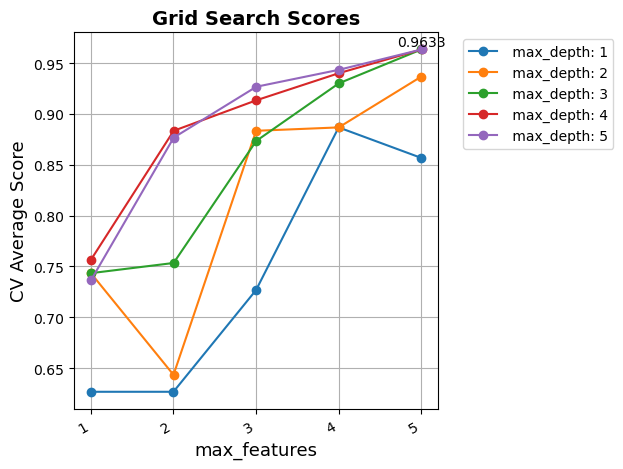

In [ ]:
DT_result_un = bestDTClassifier(un_features, un_class_variable,max_depth,max_features)
plot_grid_search(DT_result_un,max_features, max_depth, 'max_features', ' max_depth')

### LR

In [ ]:
def bestLRClassifier(X, y, C_values, solver_values):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, random_state=0)

    scaler = MinMaxScaler()

    # Scale the training data and transform the test data
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    param_grid_lr = {'C': C_values, 'solver': solver_values}

    start_time = time.time()
    grid_search_lr = GridSearchCV(LogisticRegression(random_state=0,max_iter = 1000), param_grid_lr, cv=cvKFold, return_train_score=True)
    grid_search_lr.fit(X_train, y_train)
    end_time = time.time()
    print(end_time-start_time)

    y_pred = grid_search_lr.best_estimator_.predict(X_test)

    # Calculating metrics
    report = classification_report(y_test, y_pred, output_dict=True)

    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']

    print(f"Best Parameters: C={grid_search_lr.best_params_['C']}, Solver={grid_search_lr.best_params_['solver']}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    best_C = grid_search_lr.best_params_.get('C')
    best_solver = grid_search_lr.best_params_.get('solver')
    best_score = grid_search_lr.best_score_
    test_acc = grid_search_lr.score(X_test, y_test)
    mean_test_score = grid_search_lr.cv_results_.get('mean_test_score')
    std_test_score = grid_search_lr.cv_results_.get('std_test_score')

    accuracy_dict = {}
    for i, c in enumerate(C_values):
        for j, solver in enumerate(solver_values):
            index = i * len(solver_values) + j
            accuracy = mean_test_score[index]
            accuracy_dict[f'C={c}, Solver={solver}'] = accuracy

    return_dict = {
        'mean_test_score': mean_test_score,
        'best_C': best_C,
        'best_solver': best_solver,
        'best_score': best_score,
        'accuracy_dict': accuracy_dict
    }

    return return_dict

C_values = [0.001, 0.01, 0.1, 1, 10,15]
solver_values = ['lbfgs', 'liblinear']
cvKFold = 5

results = bestLRClassifier(features, class_variable, C_values, solver_values)

accuracy_dict = results['accuracy_dict']

accuracy_dict

0.26090502738952637
Best Parameters: C=15, Solver=lbfgs
Precision: 0.9699
Recall: 0.9680
F1 Score: 0.9680


{'C=0.001, Solver=lbfgs': 0.9093333333333333,
 'C=0.001, Solver=liblinear': 0.8053333333333335,
 'C=0.01, Solver=lbfgs': 0.8933333333333333,
 'C=0.01, Solver=liblinear': 0.8320000000000001,
 'C=0.1, Solver=lbfgs': 0.9306666666666666,
 'C=0.1, Solver=liblinear': 0.8986666666666666,
 'C=1, Solver=lbfgs': 0.9653333333333333,
 'C=1, Solver=liblinear': 0.9546666666666667,
 'C=10, Solver=lbfgs': 0.984,
 'C=10, Solver=liblinear': 0.9733333333333333,
 'C=15, Solver=lbfgs': 0.9866666666666667,
 'C=15, Solver=liblinear': 0.976}

In [ ]:
results_un = bestLRClassifier(un_features, un_class_variable, C_values, solver_values)

accuracy_dict_un = results_un['accuracy_dict']

accuracy_dict_un

0.2370448112487793
Best Parameters: C=10, Solver=lbfgs
Precision: 0.9903
Recall: 0.9900
F1 Score: 0.9900


{'C=0.001, Solver=lbfgs': 0.6266666666666667,
 'C=0.001, Solver=liblinear': 0.6266666666666667,
 'C=0.01, Solver=lbfgs': 0.6266666666666667,
 'C=0.01, Solver=liblinear': 0.6266666666666667,
 'C=0.1, Solver=lbfgs': 0.9833333333333334,
 'C=0.1, Solver=liblinear': 0.9566666666666667,
 'C=1, Solver=lbfgs': 0.97,
 'C=1, Solver=liblinear': 0.9666666666666666,
 'C=10, Solver=lbfgs': 0.9866666666666667,
 'C=10, Solver=liblinear': 0.9733333333333334,
 'C=15, Solver=lbfgs': 0.9833333333333334,
 'C=15, Solver=liblinear': 0.9800000000000001}

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, class_variable, random_state=0)

X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

lr_classifier = LogisticRegression(C=10, solver='lbfgs', max_iter=1000)
lr_classifier.fit(X_train, y_train)

kf = KFold(n_splits=10, shuffle=True, random_state=0)
cv_scores = []
precisions = []
recalls = []
f1_scores = []
auc_scores = []
test_times = []

for train_index, test_index in kf.split(X_train):
    X_train_fold = X_train.iloc[train_index]
    X_test_fold = X_train.iloc[test_index]
    y_train_fold = y_train.iloc[train_index]
    y_test_fold = y_train.iloc[test_index]

    lr_classifier.fit(X_train_fold, y_train_fold)

    start_time = time.time()
    y_pred_fold = lr_classifier.predict(X_test_fold)
    end_time = time.time()

    score = lr_classifier.score(X_test_fold, y_test_fold)
    precision = precision_score(y_test_fold, y_pred_fold, zero_division=0)
    recall = recall_score(y_test_fold, y_pred_fold)
    f1 = f1_score(y_test_fold, y_pred_fold, zero_division=0)
    if hasattr(lr_classifier, "predict_proba"):
        y_pred_proba_fold = lr_classifier.predict_proba(X_test_fold)[:, 1]
        auc = roc_auc_score(y_test_fold, y_pred_proba_fold)
        auc_scores.append(auc)

    cv_scores.append(score)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    test_times.append(end_time - start_time)

average_accuracy = np.mean(cv_scores)
std_dev_accuracy = np.std(cv_scores)
average_precision = np.mean(precisions)
std_dev_precision = np.std(precisions)
average_recall = np.mean(recalls)
std_dev_recall = np.std(recalls)
average_f1 = np.mean(f1_scores)
std_dev_f1 = np.std(f1_scores)
average_testing_time = np.mean(test_times)

print("Performance Metrics with Logistic Regression Classifier:")
print(f"Average CV Accuracy: {average_accuracy:.3f}, StdDev: {std_dev_accuracy:.3f}")
print(f"Average CV Precision: {average_precision:.3f}, StdDev: {std_dev_precision:.3f}")
print(f"Average CV Recall: {average_recall:.3f}, StdDev: {std_dev_recall:.3f}")
print(f"Average CV F1 Score: {average_f1:.3f}, StdDev: {std_dev_f1:.3f}")
print(f"Average Testing Time: {average_testing_time:.3f} seconds")
if auc_scores:
    average_auc = np.mean(auc_scores)
    std_dev_auc = np.std(auc_scores)
    print(f"Average CV AUC: {average_auc:.3f}, StdDev: {std_dev_auc:.3f}")

Performance Metrics with Logistic Regression Classifier:
Average CV Accuracy: 0.968, StdDev: 0.038
Average CV Precision: 0.983, StdDev: 0.026
Average CV Recall: 0.954, StdDev: 0.058
Average CV F1 Score: 0.968, StdDev: 0.037
Average Testing Time: 0.001 seconds
Average CV AUC: 0.994, StdDev: 0.008


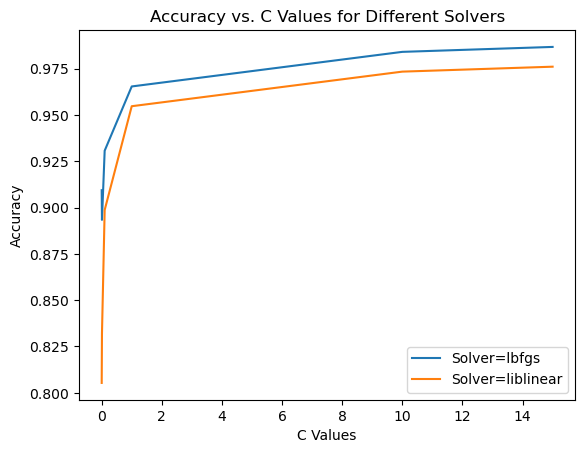

In [ ]:
solver_accuracy = {solver: [] for solver in solver_values}
for key, value in accuracy_dict.items():
    _, solver_str = key.split(', Solver=')
    solver_accuracy[solver_str].append(value)

for solver, accuracy_values in solver_accuracy.items():
    plt.plot(C_values, accuracy_values, label=f'Solver={solver}')

plt.xlabel('C Values')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. C Values for Different Solvers')
plt.legend()


### AdaBoost

In [ ]:
def bestAdaBoostClassifier(X, y, n_estimators_values, learning_rate_values):
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)
    scaler = MinMaxScaler()

    # Scale the training data and transform the test data
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    param_grid_ada = {
        'n_estimators': n_estimators_values,
        'learning_rate': learning_rate_values
    }

    start_time = time.time()
    grid_search_ada = GridSearchCV(AdaBoostClassifier(random_state=0), param_grid_ada, cv=10, return_train_score=True)
    grid_search_ada.fit(X_train, y_train)
    end_time = time.time()
    print(end_time-start_time)

    best_params = grid_search_ada.best_params_
    best_cv_score = grid_search_ada.best_score_
    cv_error = 1 - best_cv_score

    y_pred = grid_search_ada.best_estimator_.predict(X_test)
    y_pred_proba = grid_search_ada.best_estimator_.predict_proba(X_test)[:, 1]
    test_accuracy = accuracy_score(y_test, y_pred)

    # Print the results
    print("Best Parameters: ", best_params)
    print(" highest mean accuracy: ", best_cv_score)

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)

    # Print the results
    print("Best Parameters: ", best_params)
    print("Best Cross-Validation Score: ", best_cv_score)
    print("Cross-Validation Error: ", cv_error)
    print("Test Set Accuracy: ", test_accuracy)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1 Score: ", f1)
    print("AUC: ", auc)


    return grid_search_ada.cv_results_, grid_search_ada.best_params_

In [ ]:
n_estimators_values = [10,30 ,50, 100, 150]
learning_rate_values = [0.1, 0.5, 1.0]
results_ada,best_ada = bestAdaBoostClassifier(features, class_variable, n_estimators_values, learning_rate_values)

21.85470461845398
Best Parameters:  {'learning_rate': 0.1, 'n_estimators': 30}
 highest mean accuracy:  0.9973684210526315
Best Parameters:  {'learning_rate': 0.1, 'n_estimators': 30}
Best Cross-Validation Score:  0.9973684210526315
Cross-Validation Error:  0.0026315789473685403
Test Set Accuracy:  0.992
Precision:  1.0
Recall:  0.9838709677419355
F1 Score:  0.991869918699187
AUC:  0.999615975422427


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, class_variable, random_state=0)

X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

ada_classifier = AdaBoostClassifier(learning_rate=0.1, n_estimators=30)
ada_classifier.fit(X_train, y_train)

kf = KFold(n_splits=10, shuffle=True, random_state=0)
cv_scores = []
precisions = []
recalls = []
f1_scores = []
auc_scores = []
test_times = []

for train_index, test_index in kf.split(X_train):
    X_train_fold = X_train.iloc[train_index]
    X_test_fold = X_train.iloc[test_index]
    y_train_fold = y_train.iloc[train_index]
    y_test_fold = y_train.iloc[test_index]

    ada_classifier.fit(X_train_fold, y_train_fold)

    start_time = time.time()
    y_pred_fold = ada_classifier.predict(X_test_fold)
    end_time = time.time()

    score = ada_classifier.score(X_test_fold, y_test_fold)
    precision = precision_score(y_test_fold, y_pred_fold, zero_division=0)
    recall = recall_score(y_test_fold, y_pred_fold)
    f1 = f1_score(y_test_fold, y_pred_fold, zero_division=0)
    if hasattr(ada_classifier, "predict_proba"):
        y_pred_proba_fold = ada_classifier.predict_proba(X_test_fold)[:, 1]
        auc = roc_auc_score(y_test_fold, y_pred_proba_fold)
        auc_scores.append(auc)

    cv_scores.append(score)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    test_times.append(end_time - start_time)

average_accuracy = np.mean(cv_scores)
std_dev_accuracy = np.std(cv_scores)
average_precision = np.mean(precisions)
std_dev_precision = np.std(precisions)
average_recall = np.mean(recalls)
std_dev_recall = np.std(recalls)
average_f1 = np.mean(f1_scores)
std_dev_f1 = np.std(f1_scores)
average_testing_time = np.mean(test_times)

print("Performance Metrics with AdaBoost Classifier:")
print(f"Average CV Accuracy: {average_accuracy:.3f}, StdDev: {std_dev_accuracy:.3f}")
print(f"Average CV Precision: {average_precision:.3f}, StdDev: {std_dev_precision:.3f}")
print(f"Average CV Recall: {average_recall:.3f}, StdDev: {std_dev_recall:.3f}")
print(f"Average CV F1 Score: {average_f1:.3f}, StdDev: {std_dev_f1:.3f}")
print(f"Average Testing Time: {average_testing_time:.3f} seconds")
if auc_scores:
    average_auc = np.mean(auc_scores)
    std_dev_auc = np.std(auc_scores)
    print(f"Average CV AUC: {average_auc:.3f}, StdDev: {std_dev_auc:.3f}")

Performance Metrics with AdaBoost Classifier:
Average CV Accuracy: 0.992, StdDev: 0.012
Average CV Precision: 0.995, StdDev: 0.015
Average CV Recall: 0.991, StdDev: 0.018
Average CV F1 Score: 0.993, StdDev: 0.011
Average Testing Time: 0.007 seconds
Average CV AUC: 1.000, StdDev: 0.000


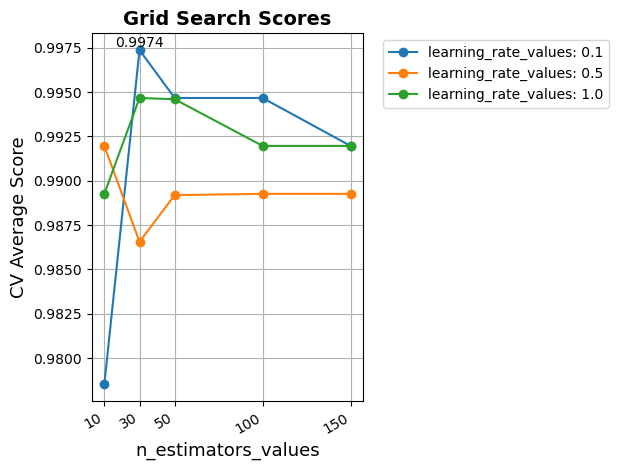

In [ ]:
plot_grid_search(results_ada,n_estimators_values, learning_rate_values, 'n_estimators_values', 'learning_rate_values')

In [ ]:
results_ada_un,best_ada_un = bestAdaBoostClassifier(un_features, un_class_variable, n_estimators_values, learning_rate_values)

Best Parameters:  {'learning_rate': 0.1, 'n_estimators': 150}
 highest mean accuracy:  0.9966666666666667
Best Parameters:  {'learning_rate': 0.1, 'n_estimators': 150}
Best Cross-Validation Score:  0.9966666666666667
Cross-Validation Error:  0.0033333333333332993
Test Set Accuracy:  0.99
Precision:  1.0
Recall:  0.9838709677419355
F1 Score:  0.991869918699187
AUC:  1.0


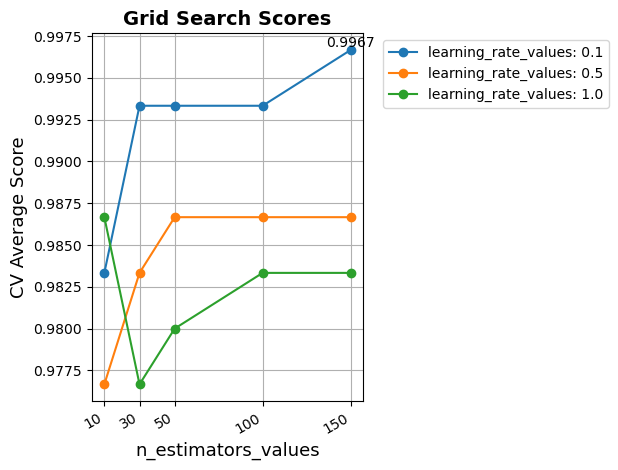

{'mean_fit_time': array([0.016065  , 0.05277793, 0.08240876, 0.17121708, 0.23739653,
        0.01489973, 0.0457495 , 0.07321758, 0.15283442, 0.23959448,
        0.01649256, 0.0474272 , 0.07673392, 0.15683076, 0.23078482]),
 'std_fit_time': array([0.00146893, 0.00548727, 0.00821033, 0.01215434, 0.01786691,
        0.00077218, 0.00618763, 0.00213659, 0.01031599, 0.01176143,
        0.00093629, 0.00277713, 0.00721644, 0.00640424, 0.01073825]),
 'mean_score_time': array([0.00202131, 0.00529261, 0.00846868, 0.01659715, 0.02322793,
        0.00282831, 0.00517354, 0.00796802, 0.01740925, 0.02438946,
        0.00216262, 0.00566487, 0.00874405, 0.01619389, 0.02465479]),
 'std_score_time': array([0.00031217, 0.00071439, 0.0012669 , 0.00183695, 0.00171793,
        0.00100829, 0.000605  , 0.00091698, 0.00260158, 0.00262468,
        0.00041237, 0.00090127, 0.00216317, 0.00116675, 0.0039526 ]),
 'param_learning_rate': masked_array(data=[0.1, 0.1, 0.1, 0.1, 0.1, 0.5, 0.5, 0.5, 0.5, 0.5, 1.0,
        

In [ ]:
plot_grid_search(results_ada_un,n_estimators_values, learning_rate_values, 'n_estimators_values', 'learning_rate_values')
results_ada_un

### ANN

In [ ]:
scaler = MinMaxScaler()
features_normal = scaler.fit_transform(features)
def bestANNClassifier(X, y, hidden_layer_sizes, batch_size, activation, learning_rate_init, momentum):
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

    param_grid_ANN = {
        'hidden_layer_sizes': hidden_layer_sizes,
        'activation': activation,
        'learning_rate_init': learning_rate_init,
        'momentum': momentum,
        'batch_size': batch_size
    }
    start_time = time.time()
    grid_search_ANN = GridSearchCV(MLPClassifier(max_iter=1000, random_state=0), param_grid_ANN, cv=10, return_train_score=True, n_jobs=-1)
    grid_search_ANN.fit(X_train, y_train)
    end_time = time.time()
    print(end_time-start_time)

    print("Best parameters found: ", grid_search_ANN.best_params_)

hidden_layer_sizes = [5,7,10]
activation = ['logistic', 'tanh', 'relu','identity']
learning_rate_init = [0.1,0.01,0.001]
momentum= [0.1,0.2, 0.3, 0.5]
batch_size = [16,32,64,128]


In [ ]:
ANN_result = bestANNClassifier(features_normal, class_variable, hidden_layer_sizes, batch_size,activation,learning_rate_init,momentum)

409.764084815979
Best parameters found:  {'activation': 'tanh', 'batch_size': 16, 'hidden_layer_sizes': 7, 'learning_rate_init': 0.01, 'momentum': 0.1}


##### ANN ROC

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features_normal, class_variable, random_state=0)

X_train = pd.DataFrame(X_train).reset_index(drop=True)
y_train = pd.Series(y_train).reset_index(drop=True)

model_ann = MLPClassifier(max_iter=1000, random_state=0, hidden_layer_sizes=(10,), activation='tanh', learning_rate_init=0.01, momentum=0.1, batch_size=16)

kf = KFold(n_splits=5, shuffle=True, random_state=0)
cv_scores = []
precisions = []
recalls = []
f1_scores = []
auc_scores = []
test_times = []

for train_index, test_index in kf.split(X_train):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    model_ann.fit(X_train_fold, y_train_fold)

    start_time = time.time()
    y_pred_fold = model_ann.predict(X_test_fold)
    end_time = time.time()

    score = model_ann.score(X_test_fold, y_test_fold)
    precision = precision_score(y_test_fold, y_pred_fold, zero_division=0)
    recall = recall_score(y_test_fold, y_pred_fold)
    f1 = f1_score(y_test_fold, y_pred_fold, zero_division=0)
    if hasattr(model_ann, "predict_proba"):
        y_pred_proba_fold = model_ann.predict_proba(X_test_fold)[:, 1]
        auc = roc_auc_score(y_test_fold, y_pred_proba_fold)
        auc_scores.append(auc)

    cv_scores.append(score)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    test_times.append(end_time - start_time)

mean_cv_accuracy = np.mean(cv_scores)
std_dev_cv_accuracy = np.std(cv_scores)
mean_precision = np.mean(precisions)
std_dev_precision = np.std(precisions)
mean_recall = np.mean(recalls)
std_dev_recall = np.std(recalls)
mean_f1 = np.mean(f1_scores)
std_dev_f1 = np.std(f1_scores)
average_testing_time = np.mean(test_times)

model_ann.fit(X_train, y_train)
predictions = model_ann.predict(X_test)
test_accuracy = accuracy_score(y_test, predictions)

print("Cross-validation scores:", cv_scores)
print(f"Mean CV accuracy: {mean_cv_accuracy:.3f}")
print(f"Standard Deviation of CV Accuracy: {std_dev_cv_accuracy:.3f}")
print(f"Average CV Precision: {mean_precision:.3f}, StdDev: {std_dev_precision:.3f}")
print(f"Average CV Recall: {mean_recall:.3f}, StdDev: {std_dev_recall:.3f}")
print(f"Average CV F1 Score: {mean_f1:.3f}, StdDev: {std_dev_f1:.3f}")
print(f"Average Testing Time: {average_testing_time:.3f} seconds")
if auc_scores:
    mean_auc = np.mean(auc_scores)
    std_dev_auc = np.std(auc_scores)
    print(f"Average CV AUC: {mean_auc:.3f}, StdDev: {std_dev_auc:.3f}")
print(f"Test set accuracy: {test_accuracy:.3f}")

Cross-validation scores: [0.9733333333333334, 0.96, 0.9733333333333334, 0.9866666666666667, 0.9866666666666667]
Mean CV accuracy: 0.976
Standard Deviation of CV Accuracy: 0.010
Average CV Precision: 0.989, StdDev: 0.014
Average CV Recall: 0.965, StdDev: 0.029
Average CV F1 Score: 0.976, StdDev: 0.008
Average Testing Time: 0.001 seconds
Average CV AUC: 0.995, StdDev: 0.007
Test set accuracy: 0.992


ANN accuracy on imbalanced data set

In [ ]:
scaler = MinMaxScaler()
features_normal_un = scaler.fit_transform(un_features)
np.random.seed(0)

X_train, X_test, y_train, y_test = train_test_split(features_normal_un, un_class_variable)

model_ann = MLPClassifier(max_iter=1000, random_state=0, hidden_layer_sizes = 10,
                          activation = 'identity',learning_rate_init = 0.001,momentum = 0.1,batch_size = 32)
model_ann.fit(X_train, y_train)

predictions = model_ann.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
auc_ann = roc_auc_score(y_test, predictions)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.99
Precision: 0.9841269841269841
Recall: 1.0
F1 Score: 0.9919999999999999


In [ ]:
predictions_mlp_proba = model_ann.predict_proba(X_test)
predictions_mlp = predictions_mlp_proba[:, 1]

fpr_mlp, tpr_mlp, _ = roc_curve(y_test, predictions_mlp)
roc_auc_mlp = auc_score(fpr_mlp, tpr_mlp)

In [ ]:
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, predictions_mlp)
roc_auc_lstm = auc_score(fpr_mlp, tpr_mlp)
auc = roc_auc_score(y_test,  predictions_mlp)

### LSTM

In [ ]:
X_array =features.values
scaler = MinMaxScaler()
X_array = scaler.fit_transform(X_array)
X_reshaped = np.resize(X_array,(X_array.shape[0],1,X_array.shape[1]))

In [ ]:
# def create_model(units, activation,drop_out):
#     model_final = Sequential()
#     model_final.add(LSTM(units=150, activation='relu', return_sequences=True, input_shape=(1, features.shape[1])))
#     model_final.add(Dropout(0.2))
#     model_final.add(LSTM(units=150, activation='relu'))
#     model_final.add(Dense(1, activation='sigmoid'))
#     model_final.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
#     return model_final

# def fit_model(units, activation, drop_out, batch_size):
#     model = create_model(units, activation, drop_out)
#     model.fit(X_reshaped, class_variable, batch_size=batch_size, epochs=10, verbose=1)
#     return model

# model = KerasClassifier(build_fn=fit_model)

# param_grid = {
#     'model__units': [50, 100, 150],
#     'model__activation': ['relu', 'tanh'],
#     'model__drop_out': [0.2, 0.3, 0.4],
#     'model__batch_size': [32, 64, 128]
# }

# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)
# grid_result = grid.fit(X_reshaped, class_variable,epochs =10)

# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

In [ ]:
kf = KFold(n_splits=3, shuffle=True, random_state=0)
accuracies = []
precisions = []
recalls = []
f1_scores = []
auc_scores = []
test_times = []

for train_index, test_index in kf.split(X_reshaped):
    X_train, X_test = X_reshaped[train_index], X_reshaped[test_index]
    y_train, y_test = class_variable[train_index], class_variable[test_index]

    model_final = Sequential([
        Input(shape=(1, X_reshaped.shape[2])),
        LSTM(units=150, activation='relu', return_sequences=True),
        Dropout(0.2),
        LSTM(units=150, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model_final.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy', AUC(name='auc')])

    model_final.fit(X_train, y_train, batch_size=32, epochs=20, verbose=0)

    test_start_time = time.time()
    predictions = model_final.predict(X_test)
    test_times.append(time.time() - test_start_time)

    predictions_binary = (predictions > 0.5).astype("int32")
    acc = accuracy_score(y_test, predictions_binary)
    prec = precision_score(y_test, predictions_binary)
    rec = recall_score(y_test, predictions_binary)
    f1 = f1_score(y_test, predictions_binary)
    auc = roc_auc_score(y_test, predictions.ravel())  # Using ravel to flatten the predictions array if needed

    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)
    auc_scores.append(auc)

accuracy_mean = np.mean(accuracies)
accuracy_std = np.std(accuracies)
precision_mean = np.mean(precisions)
precision_std = np.std(precisions)
recall_mean = np.mean(recalls)
recall_std = np.std(recalls)
f1_mean = np.mean(f1_scores)
f1_std = np.std(f1_scores)
auc_mean = np.mean(auc_scores)
auc_std = np.std(auc_scores)

print(f"Mean Accuracy: {accuracy_mean:.4f}")
print(f"Accuracy Std Dev: {accuracy_std:.4f}")
print(f"Mean Precision: {precision_mean:.4f}, Std Dev: {precision_std:.4f}")
print(f"Mean Recall: {recall_mean:.4f}, Std Dev: {recall_std:.4f}")
print(f"Mean F1 Score: {f1_mean:.4f}, Std Dev: {f1_std:.4f}")
print(f"Mean AUC: {auc_mean:.4f}, Std Dev: {auc_std:.4f}")
print(f"Average Testing Time: {np.mean(test_times):.3f} seconds")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Mean Accuracy: 0.9780
Accuracy Std Dev: 0.0103
Mean Precision: 0.9916, Std Dev: 0.0060
Mean Recall: 0.9633, Std Dev: 0.0188
Mean F1 Score: 0.9772, Std Dev: 0.0117
Mean AUC: 0.9980, Std Dev: 0.0016
Average Testing Time: 1.048 seconds


In [ ]:
fpr_lstm, tpr_lstm, _ = roc_curve(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)


In [ ]:
# import matplotlib.pyplot as plt

# def fit_model_and_get_history(units, activation, drop_out, batch_size, X_train, y_train, X_val, y_val):
#     model = create_model(units, activation, drop_out)
#     history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=batch_size, epochs=10, verbose=0)
#     return history

# batch_sizes = [32, 64, 128,256,512]
# histories = {}

# X_train, X_test, y_train, y_test = train_test_split(X_reshaped, class_variable,test_size=0.2, random_state=0)

# for batch_size in batch_sizes:
#     histories[batch_size] = fit_model_and_get_history(100, 'relu',0.2, batch_size, X_train, y_train, X_test, y_test)

# plt.figure(figsize=(12, 6))

# plt.subplot(1, 2, 1)
# for batch_size, history in histories.items():
#     plt.plot(history.history['accuracy'], label=f'Batch Size {batch_size}')
# plt.title('Model Accuracy(%) vs. Epoch')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend()

# plt.subplot(1, 2, 2)
# for batch_size, history in histories.items():
#     plt.plot(history.history['loss'], label=f'Batch Size {batch_size}')
# plt.title('Model Loss vs. Epoch')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend()

# plt.tight_layout()
# plt.show()


### RNN

In [ ]:
from tensorflow.keras.losses import BinaryCrossentropy
kf = KFold(n_splits=3, shuffle=True, random_state=0)
accuracies = []
precisions = []
recalls = []
f1_scores = []
auc_scores = []

for train_index, test_index in kf.split(X_array):
    X_train, X_test = X_array[train_index], X_array[test_index]
    y_train, y_test = class_variable[train_index], class_variable[test_index]

    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    X_train_rnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test_rnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    model = Sequential([
        Input(shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])),
        SimpleRNN(50, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['accuracy', AUC(name='auc')])
    model.fit(X_train_rnn, y_train, epochs=15, batch_size=32, validation_data=(X_test_rnn, y_test), verbose=0)

    loss, accuracy, auc = model.evaluate(X_test_rnn, y_test, verbose=0)
    accuracies.append(accuracy)
    auc_scores.append(auc)

    predictions_probs = model.predict(X_test_rnn)
    predictions = (predictions_probs > 0.5).astype("int32")

    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)

    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

    print(f"Fold Accuracy: {accuracy:.4f}")
    print(f"Fold Precision: {precision:.4f}")
    print(f"Fold Recall: {recall:.4f}")
    print(f"Fold F1 Score: {f1:.4f}")
    print(f"Fold AUC: {auc:.4f}")

mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
mean_precision = np.mean(precisions)
std_precision = np.std(precisions)
mean_recall = np.mean(recalls)
std_recall = np.std(recalls)
mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)
mean_auc = np.mean(auc_scores)
std_auc = np.std(auc_scores)

print(f"Mean Accuracy: {mean_accuracy:.4f}")
print(f"Standard Deviation of Accuracy: {std_accuracy:.4f}")
print(f"Mean Precision: {mean_precision:.4f}, Standard Deviation: {std_precision:.4f}")
print(f"Mean Recall: {mean_recall:.4f}, Standard Deviation: {std_recall:.4f}")
print(f"Mean F1 Score: {mean_f1:.4f}, Standard Deviation: {std_f1:.4f}")
print(f"Mean AUC: {mean_auc:.4f}, Standard Deviation: {std_auc:.4f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Fold Accuracy: 0.9880
Fold Precision: 0.9882
Fold Recall: 0.9882
Fold F1 Score: 0.9882
Fold AUC: 0.9991
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Fold Accuracy: 0.9880
Fold Precision: 0.9884
Fold Recall: 0.9884
Fold F1 Score: 0.9884
Fold AUC: 0.9984
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Fold Accuracy: 0.9639
Fold Precision: 0.9867
Fold Recall: 0.9367
Fold F1 Score: 0.9610
Fold AUC: 0.9908
Mean Accuracy: 0.9800
Standard Deviation of Accuracy: 0.0114
Mean Precision: 0.9878, Standard Deviation: 0.0008
Mean Recall: 0.9711, Standard Deviation: 0.0243
Mean F1 Score: 0.9792, Standard Deviation: 0.0129
Mean AUC: 0.9961, Standard Deviation: 0.0038


In [ ]:
X_array =features.values

X_train, X_test, y_train, y_test = train_test_split(X_array, class_variable,test_size=0.2, random_state=0)

scaler = MinMaxScaler()


# Scale the training data and transform the test data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_rnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_rnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

model = Sequential()
model.add(Input(shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
model.add(SimpleRNN(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_rnn, y_train, epochs=15, batch_size=32, validation_data=(X_test_rnn, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_rnn, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

predictions_probs = model.predict(X_test_rnn)
predictions = (predictions_probs > 0.5).astype("int32")

precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Epoch 1/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.5234 - loss: 0.7094 - val_accuracy: 0.5100 - val_loss: 0.6868
Epoch 2/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4922 - loss: 0.6727 - val_accuracy: 0.7100 - val_loss: 0.6344
Epoch 3/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7610 - loss: 0.6266 - val_accuracy: 0.7900 - val_loss: 0.5863
Epoch 4/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7854 - loss: 0.5675 - val_accuracy: 0.8400 - val_loss: 0.4984
Epoch 5/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8454 - loss: 0.4635 - val_accuracy: 0.9500 - val_loss: 0.2472
Epoch 6/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9334 - loss: 0.2110 - val_accuracy: 0.9700 - val_loss: 0.0752
Epoch 7/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9654 - loss: 0.1071 - val_accuracy: 0.9700 - val_loss: 0.0768
Epoch 8/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9746 - loss: 0.0944 - val_accuracy: 0.9700 - val_loss

In [ ]:
fpr_rnn, tpr_rnn, thresholds = roc_curve(y_test, predictions_probs)
roc_auc_rnn = roc_auc_score(y_test, predictions_probs)


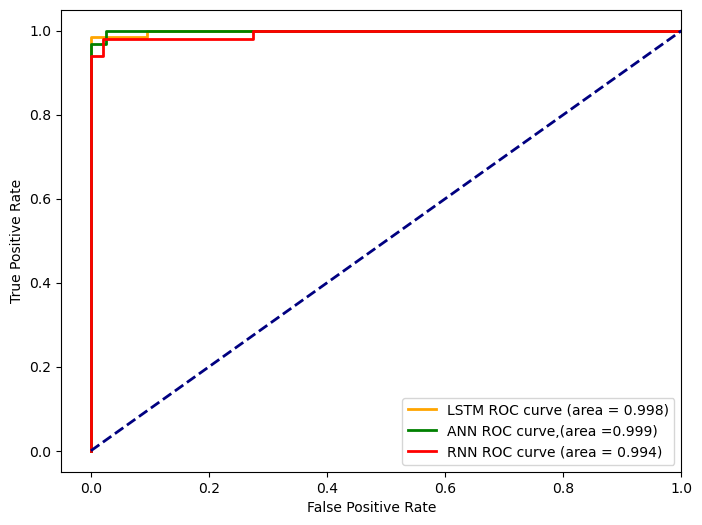

In [ ]:

plt.figure(figsize=(8, 6))
plt.plot(fpr_lstm, tpr_lstm, color='orange', lw=2,label='LSTM ROC curve (area = %0.3f)' % roc_auc )
plt.plot(fpr_mlp, tpr_mlp, color='green', lw=2, label='ANN ROC curve,(area ='+ str(round(auc,3))+')')
plt.plot(fpr_rnn, tpr_rnn, color='red', lw=2, label='RNN ROC curve (area = %0.3f)' % roc_auc_rnn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [ ]:
X_array =un_features.values

X_train, X_test, y_train, y_test = train_test_split(X_array, un_class_variable,test_size=0.2, random_state=0)

scaler = MinMaxScaler()


# Scale the training data and transform the test data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_rnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_rnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

model = Sequential()
model.add(Input(shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
model.add(SimpleRNN(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_rnn, y_train, epochs=15, batch_size=32, validation_data=(X_test_rnn, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_rnn, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

Epoch 1/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.6168 - loss: 0.6620 - val_accuracy: 0.6500 - val_loss: 0.6267
Epoch 2/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6254 - loss: 0.6215 - val_accuracy: 0.6500 - val_loss: 0.5818
Epoch 3/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6216 - loss: 0.5814 - val_accuracy: 0.6500 - val_loss: 0.5372
Epoch 4/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6484 - loss: 0.5479 - val_accuracy: 0.7625 - val_loss: 0.4808
Epoch 5/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8583 - loss: 0.4896 - val_accuracy: 0.9375 - val_loss: 0.3869
Epoch 6/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9356 - loss: 0.3830 - val_accuracy: 0.9625 - val_loss: 0.2368
Epoch 7/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9598 - loss: 0.2247 - val_accuracy: 0.9625 - val_loss: 0.1851
Epoch 8/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9427 - loss: 0.1455 - val_accuracy: 0.9625 - val_loss

## Full Dataset

In [ ]:
df = pd.read_csv(r'C:\Users\Jeff\Desktop\4001\kidney_disease_WHOLE.csv')
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [ ]:
df.drop('id', axis = 1, inplace = True)
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [ ]:
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [ ]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

df['class'] = df['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

In [ ]:
df['class'] = df['class'].map({'ckd': 0, 'not ckd': 1})
df['class'] = pd.to_numeric(df['class'], errors='coerce')

In [ ]:
df

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,0
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,0
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,0
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,0
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,1
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,1
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,1
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,1


In [ ]:
def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample

def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)


In [ ]:
for col in num_cols:
    random_value_imputation(col)

In [ ]:
random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')

for col in cat_cols[:-1]:
    impute_mode(col)

In [ ]:
random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')

for col in cat_cols:
    impute_mode(col)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
df

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,158.0,...,38.0,6000.0,5.3,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,4.7,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,...,47.0,6700.0,4.9,0,0,0,0,0,0,1
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,...,54.0,7800.0,6.2,0,0,0,0,0,0,1
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,...,49.0,6600.0,5.4,0,0,0,0,0,0,1
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,...,51.0,7200.0,5.9,0,0,0,0,0,0,1


In [ ]:
array = df.to_numpy()

In [ ]:
X = array[:,:24]
y = array[:,24]
sm = SMOTE(k_neighbors=5)
X_res, y_res = sm.fit_resample(X, y)
bal_array = np.hstack((X_res, np.atleast_2d(y_res).T))
bal_data = pd.DataFrame(bal_array,columns=df.columns.values)

In [ ]:
features =bal_data.iloc[:, :-1]
class_variable = bal_data.iloc[:, -1]

### NB

In [ ]:
results_bal = nbClassifier(features, class_variable)

In [ ]:
print("NB average cross-validation metrics on balanced data:")
print("Accuracy: {:.4f}".format(results_bal['accuracy_mean']))
print("Precision: {:.4f}".format(results_bal['precision_mean']))
print("Recall: {:.4f}".format(results_bal['recall_mean']))
print("F-Measure: {:.4f}".format(results_bal['f1_mean']))
print("AUC: {:.4f}".format(results_bal['roc_auc_mean']))

NB average cross-validation metrics on balanced data:
Accuracy: 0.9620
Precision: 0.9576
Recall: 0.9720
F-Measure: 0.9631
AUC: 0.9620


### KNN

In [ ]:
neighbors = np.arange(1, 9)
test_accuracy = np.empty(len(neighbors))
for i, k in enumerate(neighbors):
    test_accuracy[i] =kNNClassifier(features,class_variable,k)['accuracy_mean']

print("\nKNN average cross-validation metrics on balanced data:")
print(np.max(test_accuracy))
print("Accuracy: {:.4f}".format(kNNClassifier(features,class_variable,3)['accuracy_mean']))
print("Precision: {:.4f}".format(kNNClassifier(features,class_variable,3)['precision_mean']))
print("Recall: {:.4f}".format(kNNClassifier(features,class_variable,3)['recall_mean']))
print("F-Measure: {:.4f}".format(kNNClassifier(features,class_variable,3)['f1_mean']))
print("AUC: {:.4f}".format(kNNClassifier(features,class_variable,3)['roc_auc_mean']))

print("\nKNN average cross-validation metrics on balanced data:")
print(np.max(test_accuracy))


KNN average cross-validation metrics on balanced data:
0.9719999999999999
Accuracy: 0.9680
Precision: 0.9557
Recall: 0.9840
F-Measure: 0.9688
AUC: 0.9680

KNN average cross-validation metrics on balanced data:
0.9719999999999999


### RF

In [ ]:
return_dic = bestRFClassifier(features, class_variable,max_depth,n_estimators)

{'max_depth': 4, 'n_estimators': 50}
Best cross-validation accuracy: 0.9946657183499289
Cross-validation error: 0.005334281650071104


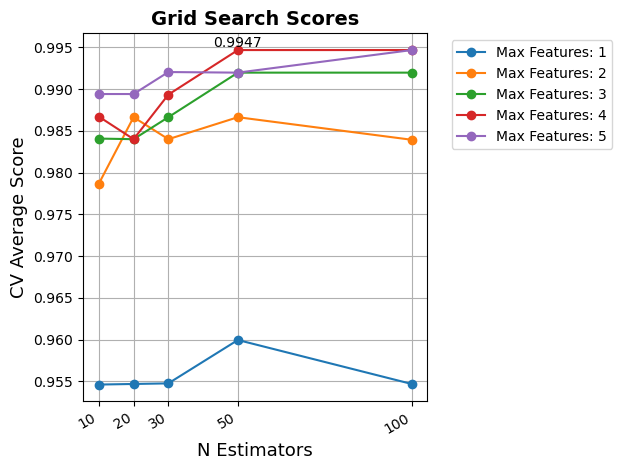

In [ ]:
plot_grid_search(return_dic, n_estimators, max_depth, 'N Estimators', 'Max Features')

### SVM

In [ ]:
SVC_result = bestLinClassifier2(features, class_variable,C,gamma)

Best parameters: {'C': 0.1, 'gamma': 0.001}
Best cross-validation accuracy: 0.9892603129445234
Cross-validation error: 0.010739687055476566


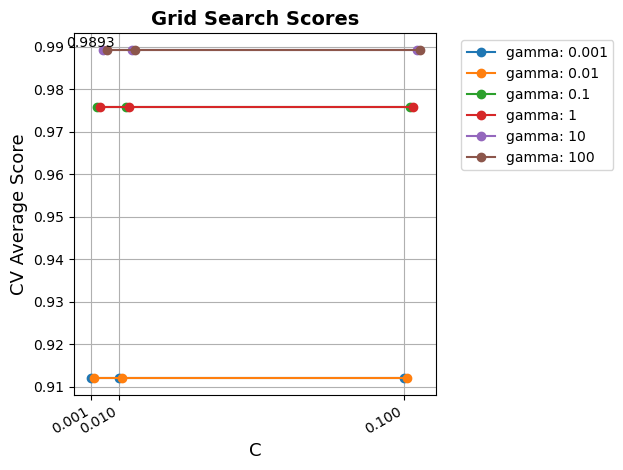

In [ ]:
plot_grid_search(SVC_result, C, gamma, 'C', 'gamma')

### DT

In [ ]:
DT_result = bestDTClassifier(features, class_variable,max_depth,max_features)

Best parameters: {'max_depth': 3, 'max_features': 4}
Best cross-validation accuracy: 0.97325746799431
Cross-validation error: 0.02674253200568999


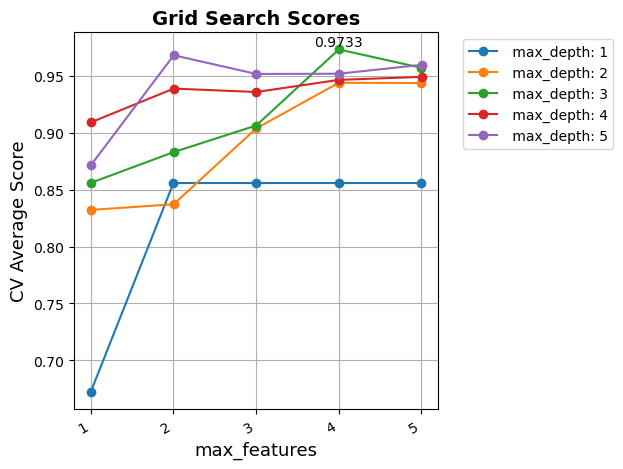

In [ ]:
plot_grid_search(DT_result,max_features, max_depth, 'max_features', ' max_depth')

### LR

In [ ]:
results = bestLRClassifier(features, class_variable, C_values, solver_values)


Best Parameters: C=10, Solver=lbfgs
Precision: 0.9680
Recall: 0.9680
F1 Score: 0.9680
Cross-validation error: 0.0107


### AdaBoost

In [ ]:
n_estimators_values = [10,30 ,50, 100, 150]
learning_rate_values = [0.1, 0.5, 1.0]
results_ada,best_ada = bestAdaBoostClassifier(features, class_variable, n_estimators_values, learning_rate_values)

Best Parameters:  {'learning_rate': 0.1, 'n_estimators': 150}
 highest mean accuracy:  0.9945945945945945
Best Parameters:  {'learning_rate': 0.1, 'n_estimators': 150}
Best Cross-Validation Score:  0.9945945945945945
Cross-Validation Error:  0.005405405405405461
Test Set Accuracy:  0.984
Precision:  0.9838709677419355
Recall:  0.9838709677419355
F1 Score:  0.9838709677419355
AUC:  0.9938556067588327


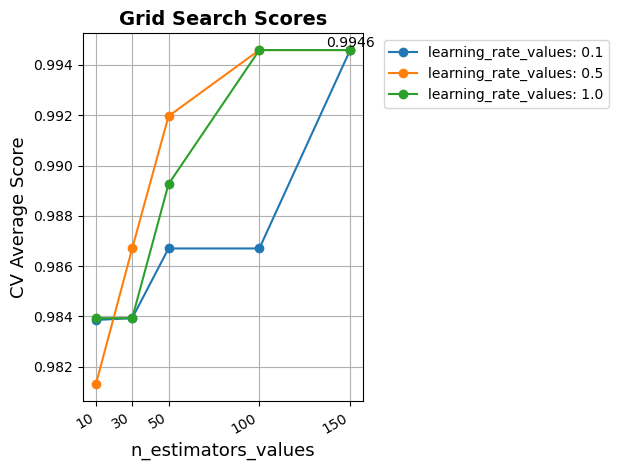

In [ ]:
plot_grid_search(results_ada,n_estimators_values, learning_rate_values, 'n_estimators_values', 'learning_rate_values')

### ANN

In [ ]:
scaler = MinMaxScaler()
features_normal = scaler.fit_transform(features)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features_normal, class_variable, random_state=0)

model_ann = MLPClassifier(max_iter=1000, random_state=0, hidden_layer_sizes=10,
                          activation='tanh', learning_rate_init=0.01, momentum=0.1, batch_size=16)

# Perform cross-validation
cv_scores = cross_val_score(model_ann, X_train, y_train, cv=5)

# Fit the model on the training data
model_ann.fit(X_train, y_train)

# Make predictions on the test data
predictions = model_ann.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean()}")
print(f"Test set accuracy: {accuracy}")

Cross-validation scores: [0.98666667 1.         0.97333333 0.97333333 0.97333333]
Mean CV accuracy: 0.9813333333333334
Test set accuracy: 0.968


### LSTM

In [ ]:
X_array =features.values
scaler = MinMaxScaler()
X_array = scaler.fit_transform(X_array)
X_reshaped = np.resize(X_array,(X_array.shape[0],1,X_array.shape[1]))

In [ ]:
start_time = time.time()

X_train, X_test, y_train, y_test = train_test_split(X_reshaped, class_variable, random_state=0)
model_final = Sequential()
model_final.add(LSTM(units=150, activation='relu', return_sequences=True, input_shape=(1, features.shape[1])))
model_final.add(Dropout(0.2))
model_final.add(LSTM(units=150, activation='relu'))
model_final.add(Dense(1, activation='sigmoid'))
model_final.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Fit the model with verbose=1 to show the progress for each epoch
model_final.fit(X_train, y_train, batch_size=32, epochs=20, verbose=1)

#time start here
predictions = model_final.predict(X_test)
predictions_binary = (predictions > 0.5).astype("int32")


accuracy = accuracy_score(y_test, predictions_binary)
precision = precision_score(y_test, predictions_binary)
recall = recall_score(y_test, predictions_binary)
f1 = f1_score(y_test, predictions_binary)
auc = roc_auc_score(y_test, predictions_binary)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(auc)
end_time = time.time()
computation_time = end_time - start_time
computation_time

Epoch 1/20


C:\Users\Jeff\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6156 - loss: 0.6914
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8330 - loss: 0.6818 
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8936 - loss: 0.6635 
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8997 - loss: 0.6245 
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9138 - loss: 0.5622 
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8965 - loss: 0.4713 
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9261 - loss: 0.3706 
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9371 - loss: 0.2605 
Epoch 9/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9429 - loss: 0.2080 
Epoch 10/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9537 - loss: 0.1487 
Epoch 11/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9619 - loss: 0.1238 
Epoch 12/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9564 - los

4.468790292739868

### RNN

In [ ]:
from tensorflow.keras.layers import SimpleRNN, Dense, Input

X_array =features.values

X_train, X_test, y_train, y_test = train_test_split(X_array, class_variable,test_size=0.2, random_state=0)

scaler = MinMaxScaler()


# Scale the training data and transform the test data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_rnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_rnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

model = Sequential()
model.add(Input(shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
model.add(SimpleRNN(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_rnn, y_train, epochs=15, batch_size=32, validation_data=(X_test_rnn, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_rnn, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

predictions_probs = model.predict(X_test_rnn)
predictions = (predictions_probs > 0.5).astype("int32")

precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Epoch 1/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.3357 - loss: 0.7016 - val_accuracy: 0.8100 - val_loss: 0.6762
Epoch 2/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8922 - loss: 0.6651 - val_accuracy: 0.8800 - val_loss: 0.6270
Epoch 3/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8945 - loss: 0.6115 - val_accuracy: 0.8000 - val_loss: 0.5305
Epoch 4/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7875 - loss: 0.5187 - val_accuracy: 0.9100 - val_loss: 0.3950
Epoch 5/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9186 - loss: 0.3670 - val_accuracy: 0.9000 - val_loss: 0.2081
Epoch 6/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8985 - loss: 0.2301 - val_accuracy: 0.9000 - val_loss: 0.2063
Epoch 7/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9446 - loss: 0.1490 - val_accuracy: 0.8700 - val_loss: 0.2249
Epoch 8/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9168 - loss: 0.2096 - val_accuracy: 0.9200 - val_loss

## Accuracies plot with error bar

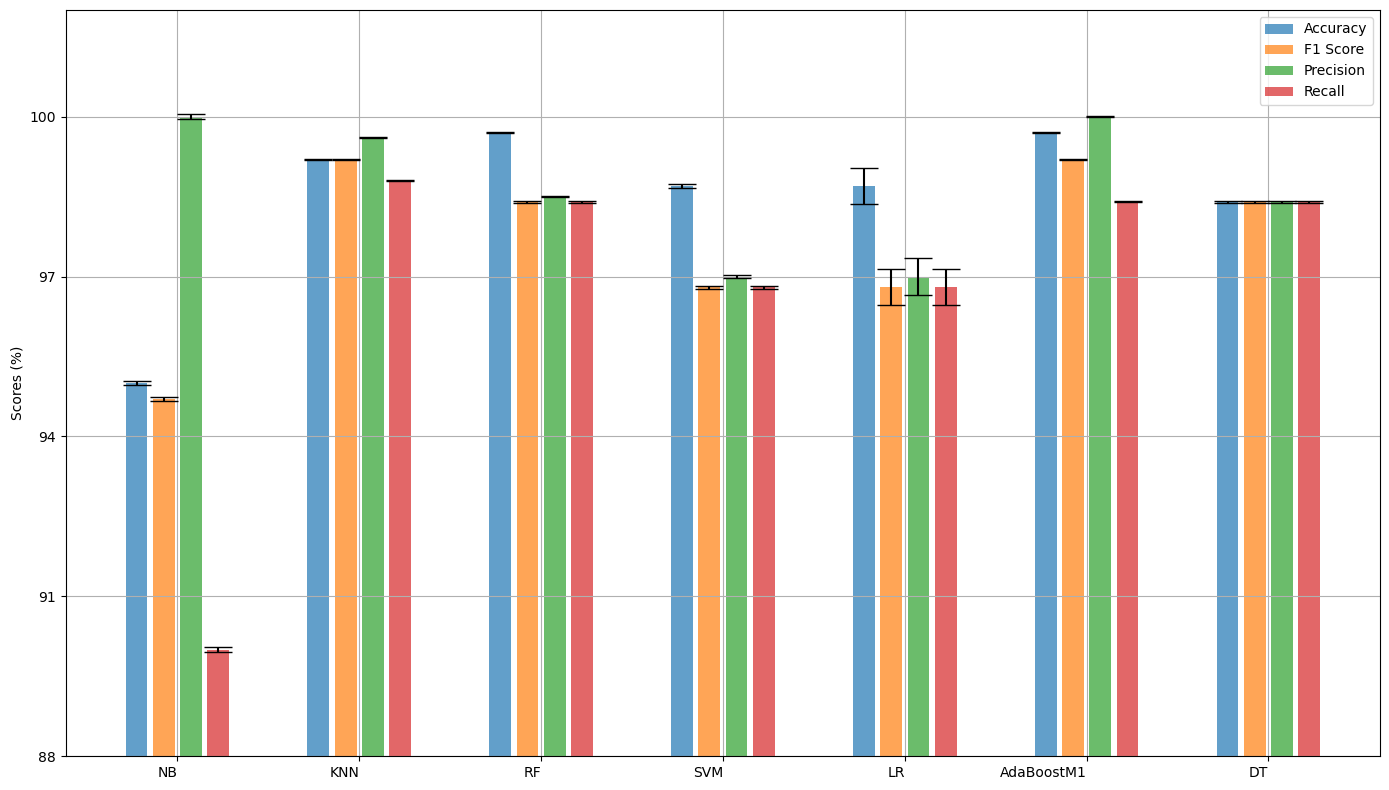

In [ ]:
# Updated Data

algorithms = ['NB', 'KNN', 'RF', 'SVM', 'LR', 'AdaBoostM1', 'DT']

accuracies = [95  , 99.2, 99.7, 98.7, 98.7, 99.7, 98.4]

f1_scores =  [94.7, 99.2, 98.4, 96.8, 96.8, 99.2, 98.4]

precisions = [100 , 99.6, 98.5, 97.0, 97.0, 100 , 98.4]

recalls =    [90  , 98.8, 98.4, 96.8, 96.8, 98.4, 98.4]


errors = [0.042,0.009,0.013,0.031,0.34,0.01,0.016]



# Data to plot

metrics = [accuracies, f1_scores, precisions, recalls]

metrics_labels = ['Accuracy', 'F1 Score', 'Precision', 'Recall']



# Plotting

x_pos = np.arange(len(algorithms))

width = 0.15  # the width of the bars



fig, ax = plt.subplots(figsize=(14, 8))



# Create bars for each metric

for i, (metric, label) in enumerate(zip(metrics, metrics_labels)):

    ax.bar(x_pos + i * width, metric, width*0.8, yerr=errors, label=label, alpha=0.7, ecolor='black', capsize=10)



# Add some text for labels, title and axes ticks

#ax.set_xlabel('Machine Learning Algorithms')

ax.set_ylabel('Scores (%)')

#ax.set_title('Performance Metrics of Different Machine Learning Algorithms with Error Bars')

ax.set_xticks(x_pos + width * 1.5)

#ax.set_xticklabels(algorithms, rotation=45, ha='right')

ax.set_xticklabels(algorithms, ha='right')

ax.set_ylim(88, 102)  # Set y-axis limit to make space for error bars

ax.set_yticks(np.arange(88, 101, 3))  # Set y-axis ticks to stop at 100

ax.legend()



plt.grid(True)

plt.tight_layout()

plt.savefig('samplegraph.pdf')

plt.show()

# Kazi Tanvir

In [ ]:
df = pd.read_csv("/content/kidney_disease.csv")
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [ ]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [ ]:

missing_value_percentage = df.isnull().sum() / len(df) * 100
print(missing_value_percentage)


id                 0.00
age                2.25
bp                 3.00
sg                11.75
al                11.50
su                12.25
rbc               38.00
pc                16.25
pcc                1.00
ba                 1.00
bgr               11.00
bu                 4.75
sc                 4.25
sod               21.75
pot               22.00
hemo              13.00
pcv               17.50
wc                26.25
rc                32.50
htn                0.50
dm                 0.50
cad                0.50
appet              0.25
pe                 0.25
ane                0.25
classification     0.00
dtype: float64


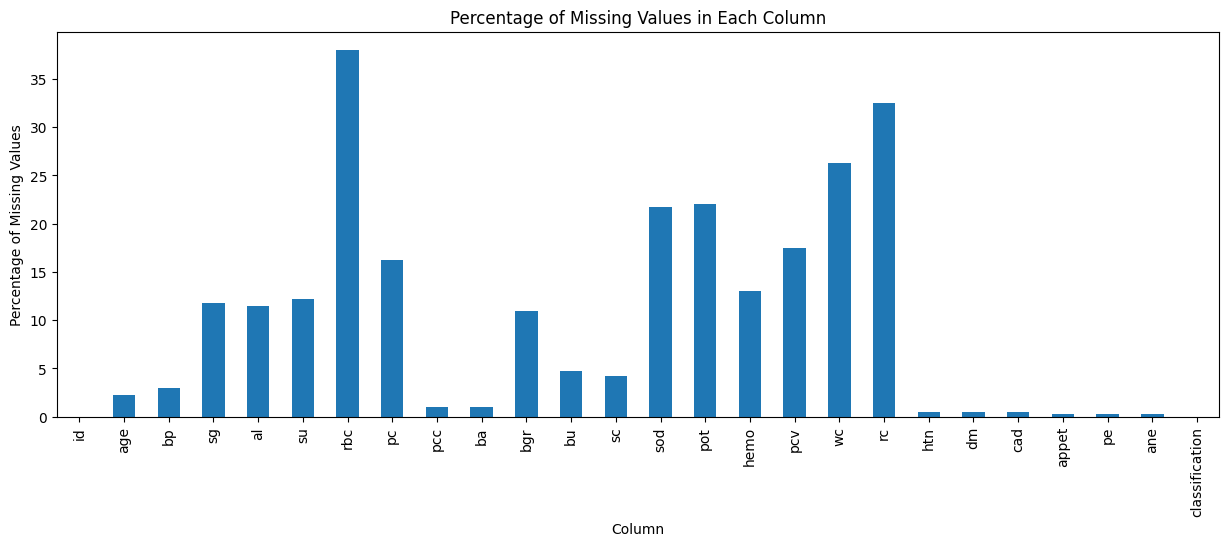

In [ ]:

import matplotlib.pyplot as plt

missing_value_percentage.plot(kind='bar', figsize=(15, 5))
plt.xlabel('Column')
plt.ylabel('Percentage of Missing Values')
plt.title('Percentage of Missing Values in Each Column')
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [ ]:
df = df.drop('id', axis=1)
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [ ]:

categorical_columns = []
for col in df.columns:
    if len(df[col].unique()) < 8:
        categorical_columns.append(col)

print(f"Categorical columns with numerical transformation: {categorical_columns}")
len(categorical_columns)

Categorical columns with numerical transformation: ['sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']


14

In [ ]:
from sklearn.preprocessing import LabelEncoder


# Initialize LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
# prompt: apply label encoding for all the categorical columns except sg

# Apply label encoding to all categorical columns except 'sg'
for col in categorical_columns:
    if col != 'sg':
        df[col] = label_encoder.fit_transform(df[col])

# Print the transformed DataFrame
df


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1,0,2,1,0,0,121.0,...,44,7800,5.2,1,4,1,0,0,0,0
1,7.0,50.0,1.020,4,0,2,1,0,0,NaN,...,38,6000,NaN,0,3,1,0,0,0,0
2,62.0,80.0,1.010,2,3,1,1,0,0,423.0,...,31,7500,NaN,0,4,1,1,0,1,0
3,48.0,70.0,1.005,4,0,1,0,1,0,117.0,...,32,6700,3.9,1,3,1,1,1,1,0
4,51.0,80.0,1.010,2,0,1,1,0,0,106.0,...,35,7300,4.6,0,3,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0,0,1,1,0,0,140.0,...,47,6700,4.9,0,3,1,0,0,0,1
396,42.0,70.0,1.025,0,0,1,1,0,0,75.0,...,54,7800,6.2,0,3,1,0,0,0,1
397,12.0,80.0,1.020,0,0,1,1,0,0,100.0,...,49,6600,5.4,0,3,1,0,0,0,1
398,17.0,60.0,1.025,0,0,1,1,0,0,114.0,...,51,7200,5.9,0,3,1,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              400 non-null    int64  
 4   su              400 non-null    int64  
 5   rbc             400 non-null    int64  
 6   pc              400 non-null    int64  
 7   pcc             400 non-null    int64  
 8   ba              400 non-null    int64  
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

In [ ]:
import numpy as np

# Replace non-numeric values with NaN
df['pcv'] = pd.to_numeric(df['pcv'], errors='coerce')
df['wc'] = pd.to_numeric(df['wc'], errors='coerce')
df['rc'] = pd.to_numeric(df['rc'], errors='coerce')

# Convert columns to float64
df['pcv'] = df['pcv'].astype('float64')
df['wc'] = df['wc'].astype('float64')
df['rc'] = df['rc'].astype('float64')


In [ ]:
df1 = df.copy()

In [ ]:
df1

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1,0,2,1,0,0,121.0,...,44.0,7800.0,5.2,1,4,1,0,0,0,0
1,7.0,50.0,1.020,4,0,2,1,0,0,NaN,...,38.0,6000.0,NaN,0,3,1,0,0,0,0
2,62.0,80.0,1.010,2,3,1,1,0,0,423.0,...,31.0,7500.0,NaN,0,4,1,1,0,1,0
3,48.0,70.0,1.005,4,0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,3,1,1,1,1,0
4,51.0,80.0,1.010,2,0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,3,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0,0,1,1,0,0,140.0,...,47.0,6700.0,4.9,0,3,1,0,0,0,1
396,42.0,70.0,1.025,0,0,1,1,0,0,75.0,...,54.0,7800.0,6.2,0,3,1,0,0,0,1
397,12.0,80.0,1.020,0,0,1,1,0,0,100.0,...,49.0,6600.0,5.4,0,3,1,0,0,0,1
398,17.0,60.0,1.025,0,0,1,1,0,0,114.0,...,51.0,7200.0,5.9,0,3,1,0,0,0,1


In [ ]:

import pandas as pd

# Get the columns with null values
null_columns = df1.columns[df1.isnull().any()]

# Print the null columns
print(null_columns)


Index(['age', 'bp', 'sg', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc',
       'rc'],
      dtype='object')


In [ ]:

df1 = df1.dropna(subset=null_columns)


In [ ]:
df1

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
3,48.0,70.0,1.005,4,0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,3,1,1,1,1,0
5,60.0,90.0,1.015,3,0,2,2,0,0,74.0,...,39.0,7800.0,4.4,1,4,1,0,1,0,0
9,53.0,90.0,1.020,2,0,0,0,1,0,70.0,...,29.0,12100.0,3.7,1,4,1,1,0,1,0
11,63.0,70.0,1.010,3,0,0,0,1,0,380.0,...,32.0,4500.0,3.8,1,4,1,1,1,0,0
12,68.0,70.0,1.015,3,1,2,1,1,0,208.0,...,28.0,12200.0,3.4,1,4,2,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0,0,1,1,0,0,140.0,...,47.0,6700.0,4.9,0,3,1,0,0,0,1
396,42.0,70.0,1.025,0,0,1,1,0,0,75.0,...,54.0,7800.0,6.2,0,3,1,0,0,0,1
397,12.0,80.0,1.020,0,0,1,1,0,0,100.0,...,49.0,6600.0,5.4,0,3,1,0,0,0,1
398,17.0,60.0,1.025,0,0,1,1,0,0,114.0,...,51.0,7200.0,5.9,0,3,1,0,0,0,1


In [ ]:
!pip install lazypredict

In [ ]:

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X = df1.drop(columns=['classification'])
y = df1['classification']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# prompt: df_filtered apply all ML algorothmns

# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train different machine learning models
import lazypredict
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)


100%|██████████| 29/29 [00:01<00:00, 14.69it/s]

[LightGBM] [Info] Number of positive: 98, number of negative: 64
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000394 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 392
[LightGBM] [Info] Number of data points in the train set: 162, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.604938 -> initscore=0.426084
[LightGBM] [Info] Start training from score 0.426084
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

In [ ]:

null_columns = df.columns[df.isnull().any()]
print(null_columns)


Index(['age', 'bp', 'sg', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc',
       'rc'],
      dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron


y1 = df1['age']
x1= df1.drop(columns=['age'])

perceptron_model = Perceptron(max_iter=1000, tol=1e-3)   # You can adjust the number of neighbors as needed

# Fit the model
perceptron_model.fit(x1, y1)

x1= df.drop(columns=['age'])

x1.fillna(0, inplace=True)

df['age'] = perceptron_model.predict(x1)
df['age'].isnull().sum()

0

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron


y1 = df1['bp']
x1= df1.drop(columns=['bp'])

perceptron_model = Perceptron(max_iter=1000, tol=1e-3)   # You can adjust the number of neighbors as needed

# Fit the model
perceptron_model.fit(x1, y1)

x1= df.drop(columns=['bp'])

x1.fillna(0, inplace=True)

df['bp'] = perceptron_model.predict(x1)

df['bp'].isnull().sum()

0

In [ ]:

from sklearn.ensemble import RandomForestRegressor

# Define the target and features
y1 = df1['sg']
x1 = df1.drop(columns=['sg'])

# Initialize the RandomForestRegressor model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
random_forest_model.fit(x1, y1)

# Prepare the features for prediction
x1_new = df.drop(columns=['sg'])
x1_new.fillna(0, inplace=True)

# Make predictions
df['sg'] = random_forest_model.predict(x1_new)

# Check for any null values in the predictions
null_count = df['sg'].isnull().sum()
print(null_count)


0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron


y1 = df1['bgr']
x1= df1.drop(columns=['bgr'])

perceptron_model = Perceptron(max_iter=1000, tol=1e-3)   # You can adjust the number of neighbors as needed

# Fit the model
perceptron_model.fit(x1, y1)

x1= df.drop(columns=['bgr'])

x1.fillna(0, inplace=True)

df['bgr'] = perceptron_model.predict(x1)

df['bgr'].isnull().sum()

0

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron


y1 = df1['bu']
x1= df1.drop(columns=['bu'])

perceptron_model = Perceptron(max_iter=1000, tol=1e-3)   # You can adjust the number of neighbors as needed

# Fit the model
perceptron_model.fit(x1, y1)

x1= df.drop(columns=['bu'])

x1.fillna(0, inplace=True)

df['bu'] = perceptron_model.predict(x1)

df['bu'].isnull().sum()

0

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Define the target and features
y1 = df1['sc']
x1 = df1.drop(columns=['sc'])

# Initialize the RandomForestRegressor model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
random_forest_model.fit(x1, y1)

# Prepare the features for prediction
x1_new = df.drop(columns=['sc'])
x1_new.fillna(0, inplace=True)

# Make predictions
df['sc'] = random_forest_model.predict(x1_new)

# Check for any null values in the predictions
null_count = df['sc'].isnull().sum()
print(null_count)

0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron


y1 = df1['sod']
x1= df1.drop(columns=['sod'])

perceptron_model = Perceptron(max_iter=1000, tol=1e-3)   # You can adjust the number of neighbors as needed

# Fit the model
perceptron_model.fit(x1, y1)

x1= df.drop(columns=['sod'])

x1.fillna(0, inplace=True)

df['sod'] = perceptron_model.predict(x1)

df['sod'].isnull().sum()

0

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Define the target and features
y1 = df1['pot']
x1 = df1.drop(columns=['pot'])

# Initialize the RandomForestRegressor model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
random_forest_model.fit(x1, y1)

# Prepare the features for prediction
x1_new = df.drop(columns=['pot'])
x1_new.fillna(0, inplace=True)

# Make predictions
df['pot'] = random_forest_model.predict(x1_new)

# Check for any null values in the predictions
null_count = df['pot'].isnull().sum()
print(null_count)

0


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Define the target and features
y1 = df1['hemo']
x1 = df1.drop(columns=['hemo'])

# Initialize the RandomForestRegressor model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
random_forest_model.fit(x1, y1)

# Prepare the features for prediction
x1_new = df.drop(columns=['hemo'])
x1_new.fillna(0, inplace=True)

# Make predictions
df['hemo'] = random_forest_model.predict(x1_new)

# Check for any null values in the predictions
null_count = df['hemo'].isnull().sum()
print(null_count)

0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron


y1 = df1['pcv']
x1= df1.drop(columns=['pcv'])

perceptron_model = Perceptron(max_iter=1000, tol=1e-3)   # You can adjust the number of neighbors as needed

# Fit the model
perceptron_model.fit(x1, y1)

x1= df.drop(columns=['pcv'])

x1.fillna(0, inplace=True)

df['pcv'] = perceptron_model.predict(x1)

df['pcv'].isnull().sum()

0

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron


y1 = df1['wc']
x1= df1.drop(columns=['wc'])

perceptron_model = Perceptron(max_iter=1000, tol=1e-3)   # You can adjust the number of neighbors as needed

# Fit the model
perceptron_model.fit(x1, y1)

x1= df.drop(columns=['wc'])

x1.fillna(0, inplace=True)

df['wc'] = perceptron_model.predict(x1)

df['wc'].isnull().sum()

0

In [ ]:

from sklearn.ensemble import RandomForestRegressor

# Define the target and features
y1 = df1['rc']
x1 = df1.drop(columns=['rc'])

# Initialize the RandomForestRegressor model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
random_forest_model.fit(x1, y1)

# Prepare the features for prediction
x1_new = df.drop(columns=['rc'])
x1_new.fillna(0, inplace=True)

# Make predictions
df['rc'] = random_forest_model.predict(x1_new)

# Check for any null values in the predictions
null_count = df['rc'].isnull().sum()
print(null_count)

df.isnull().sum()

0


age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

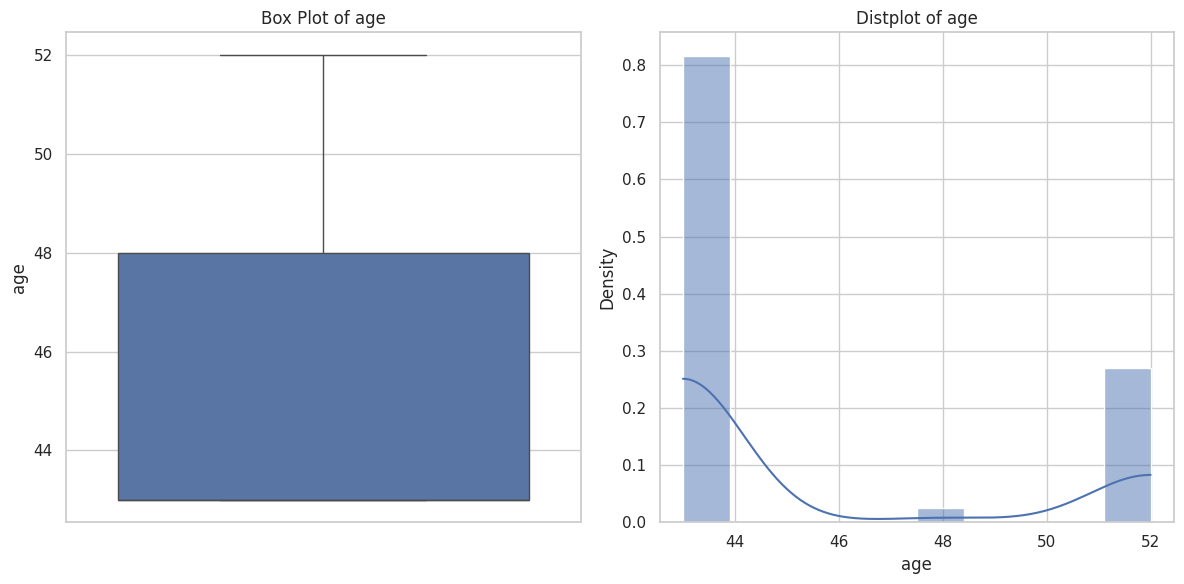

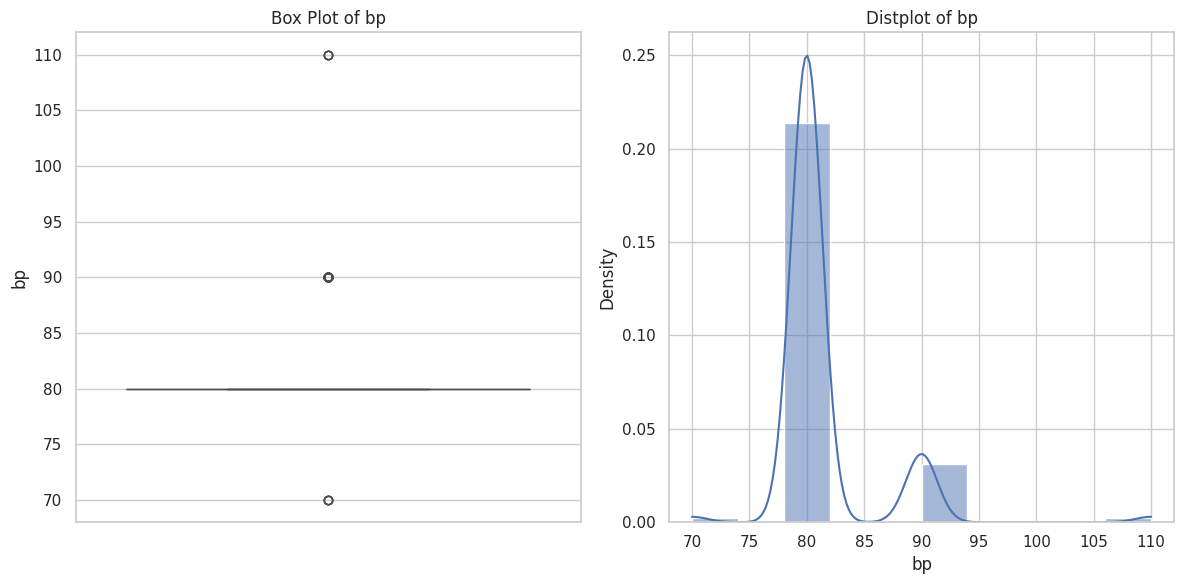

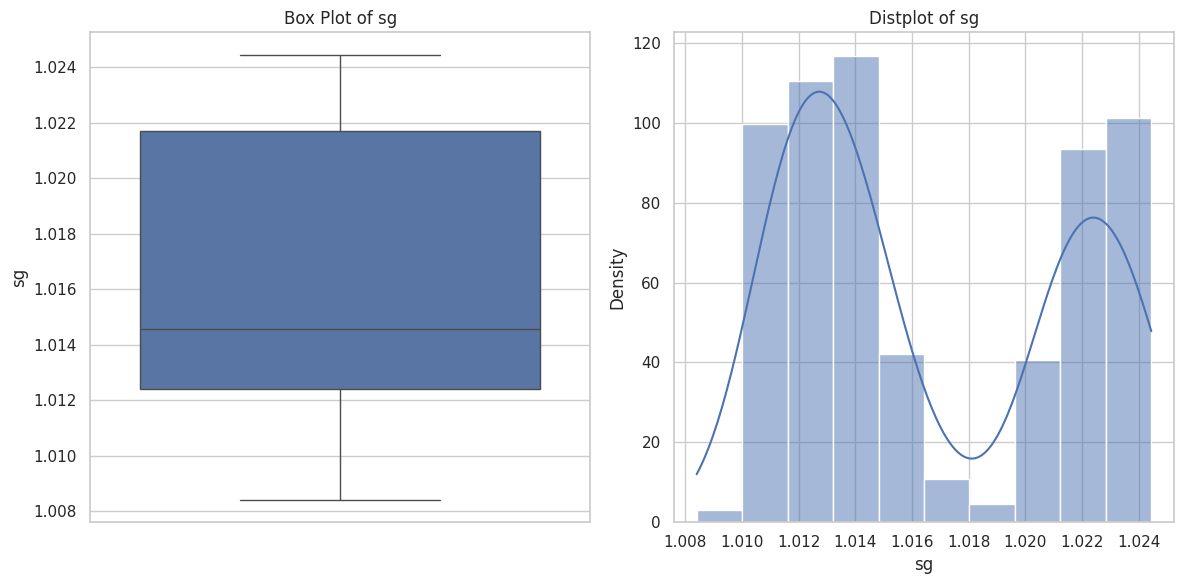

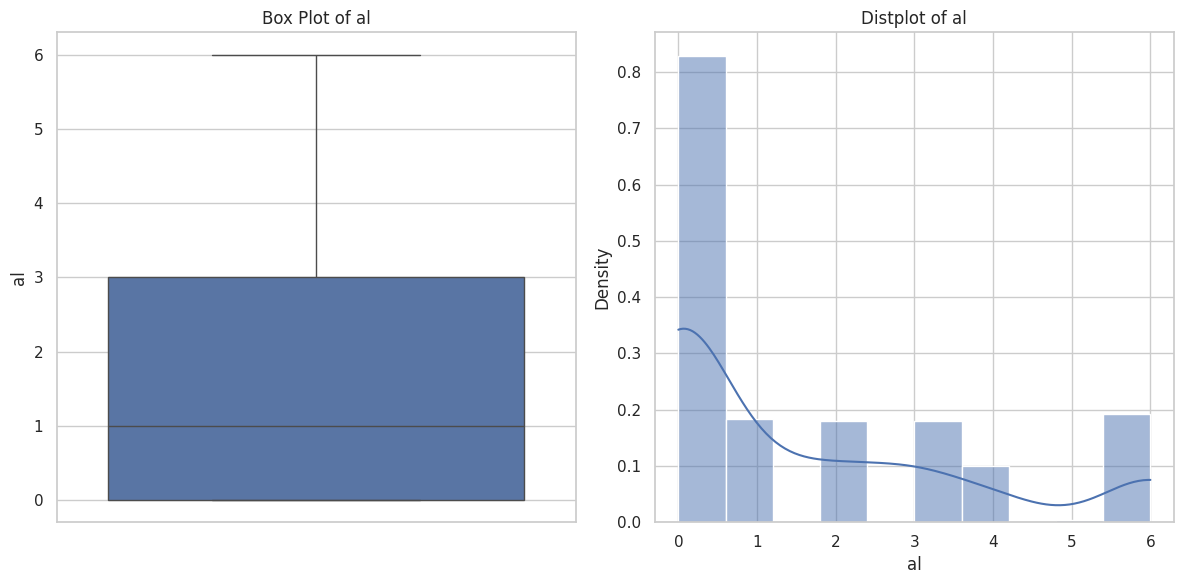

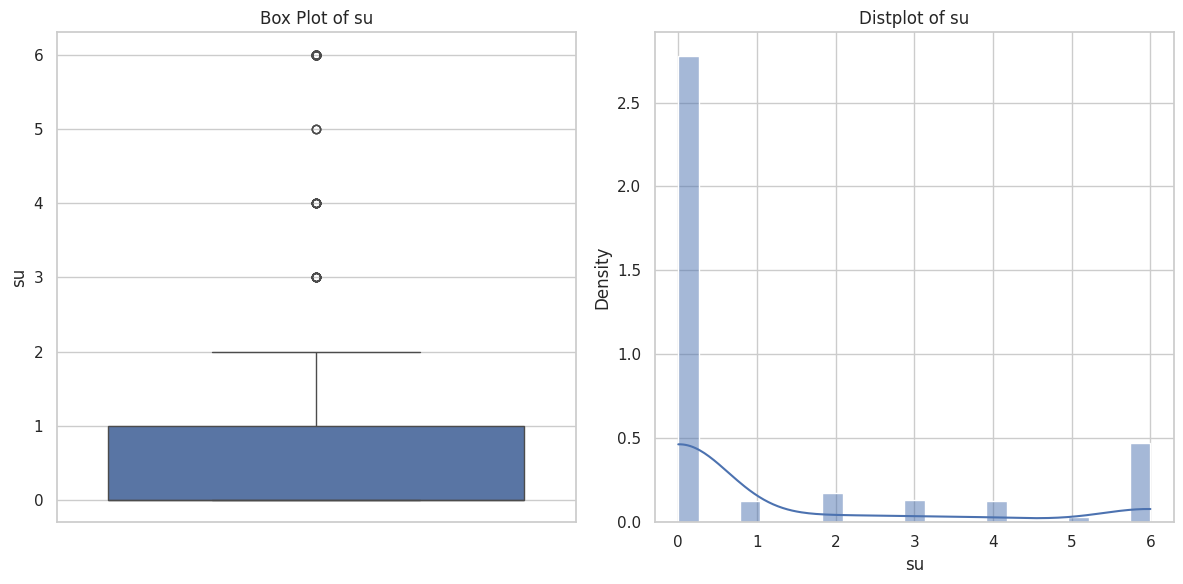

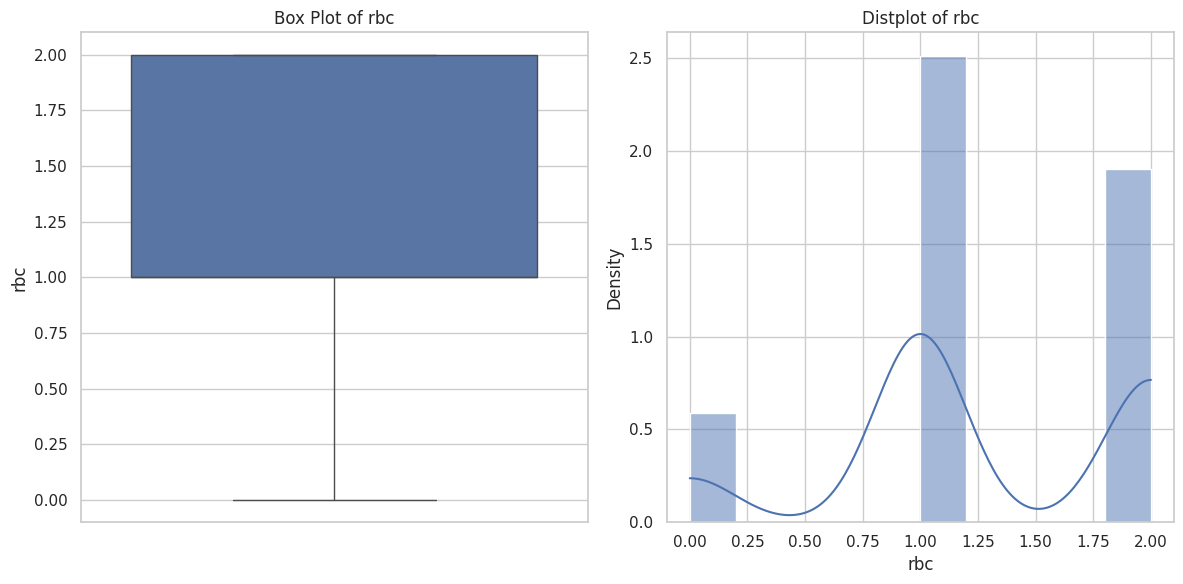

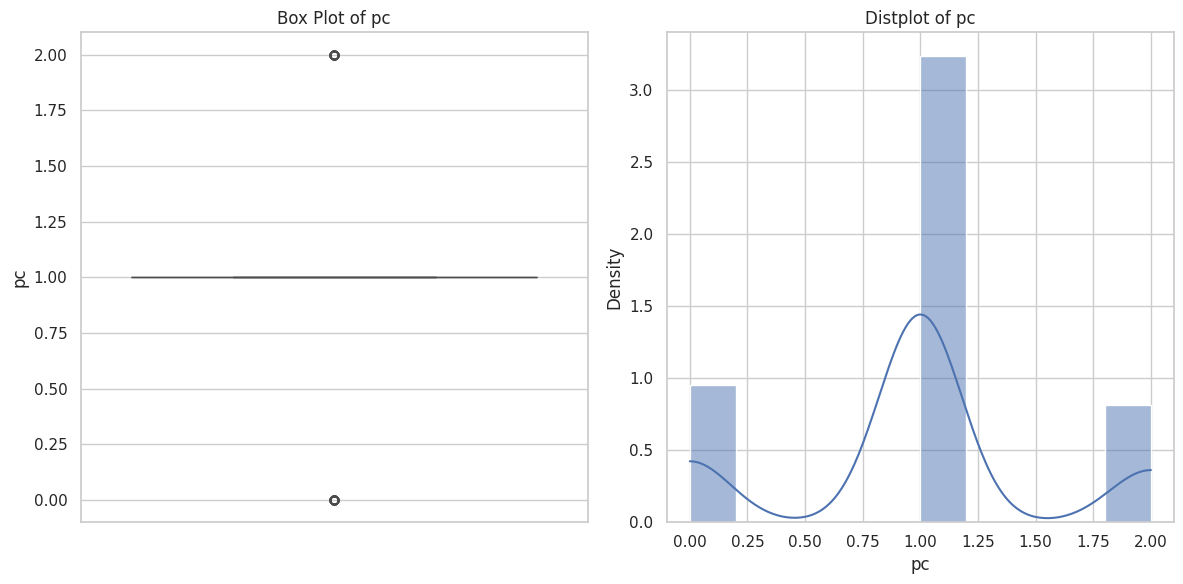

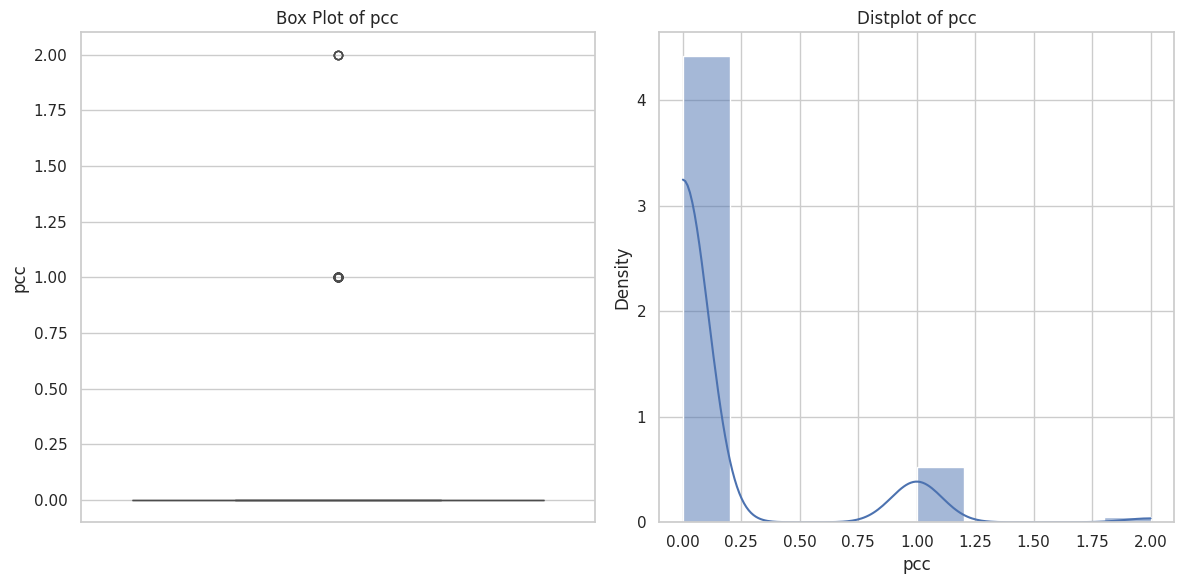

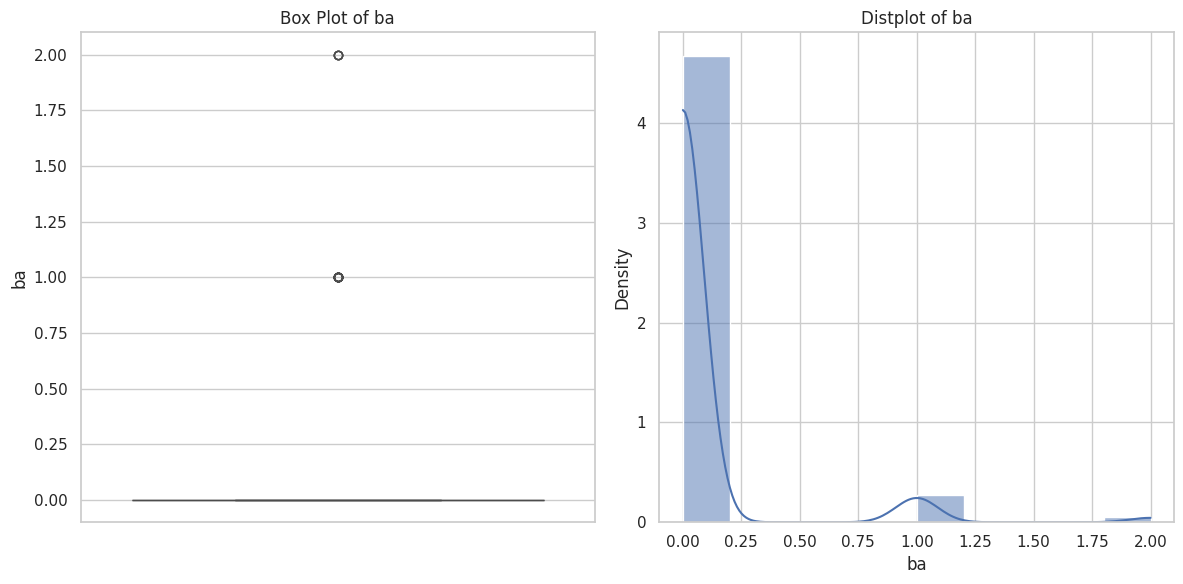

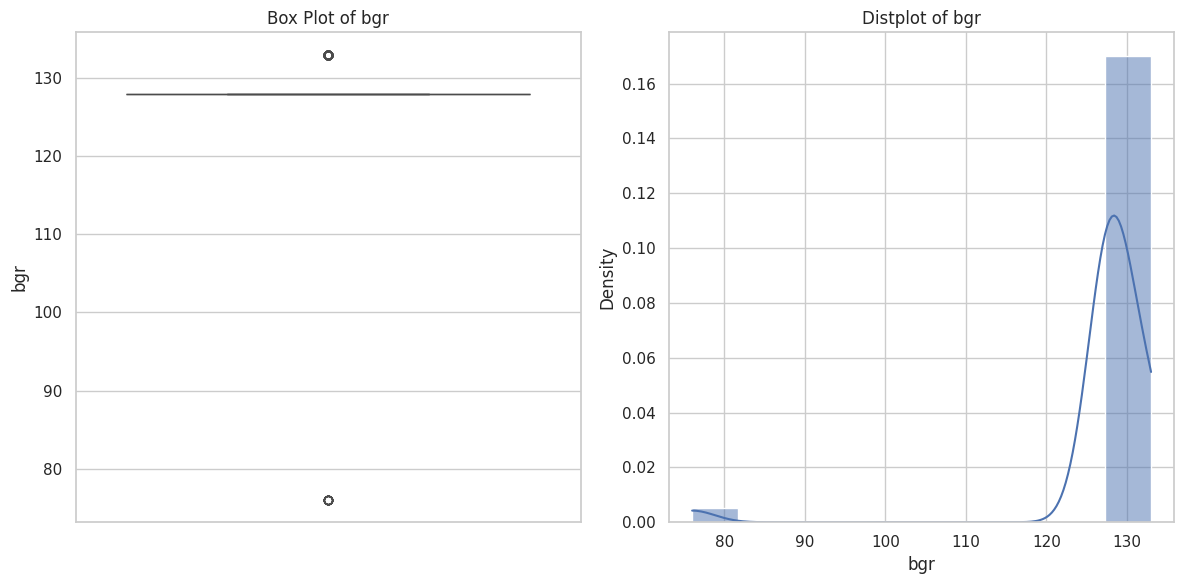

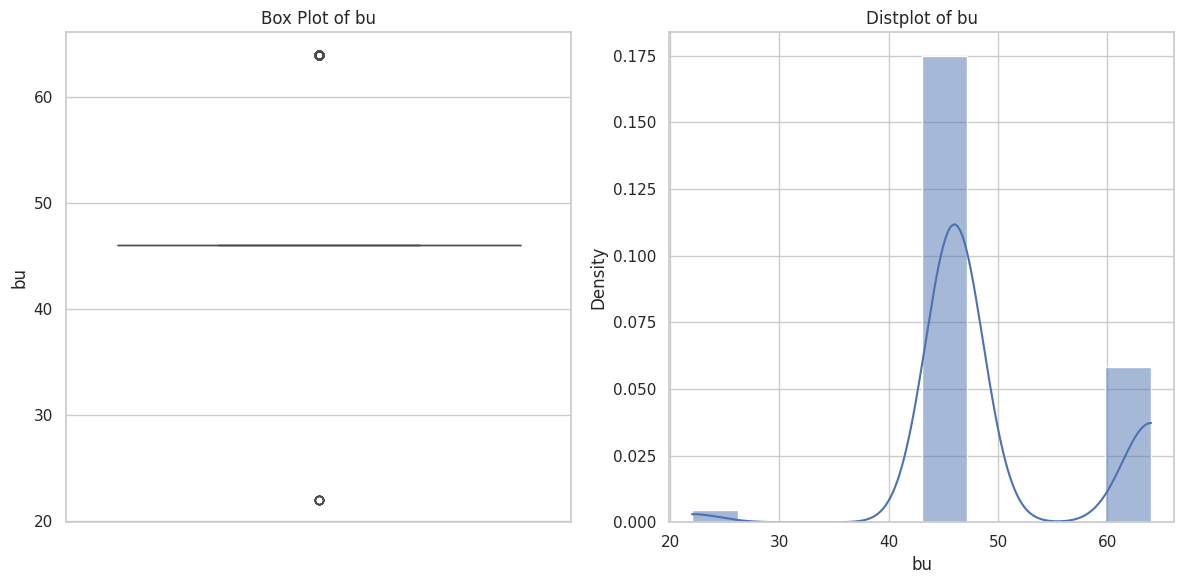

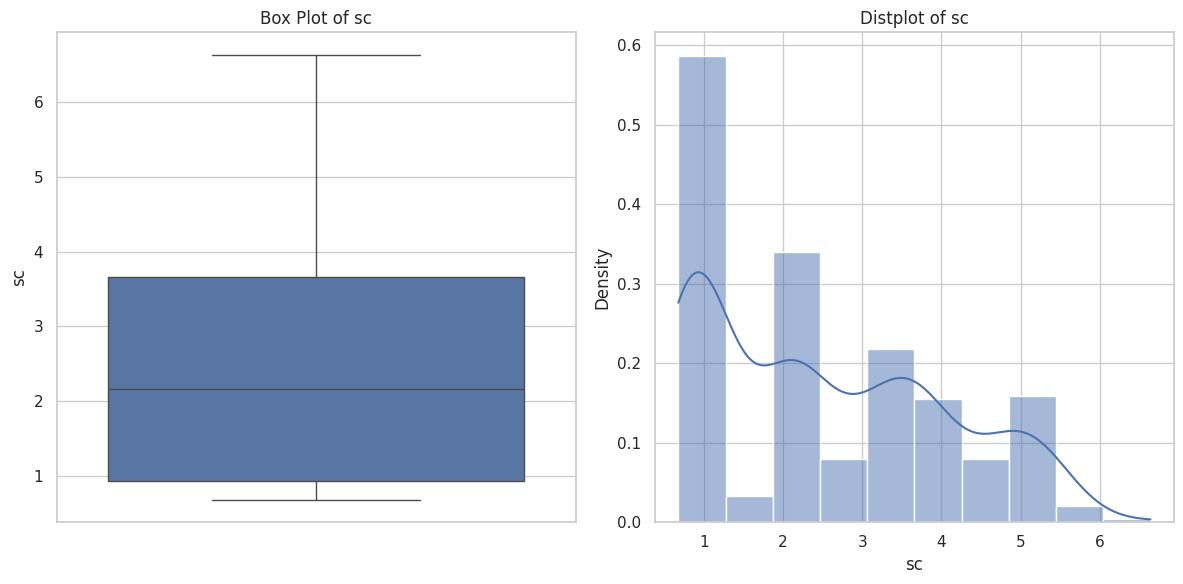

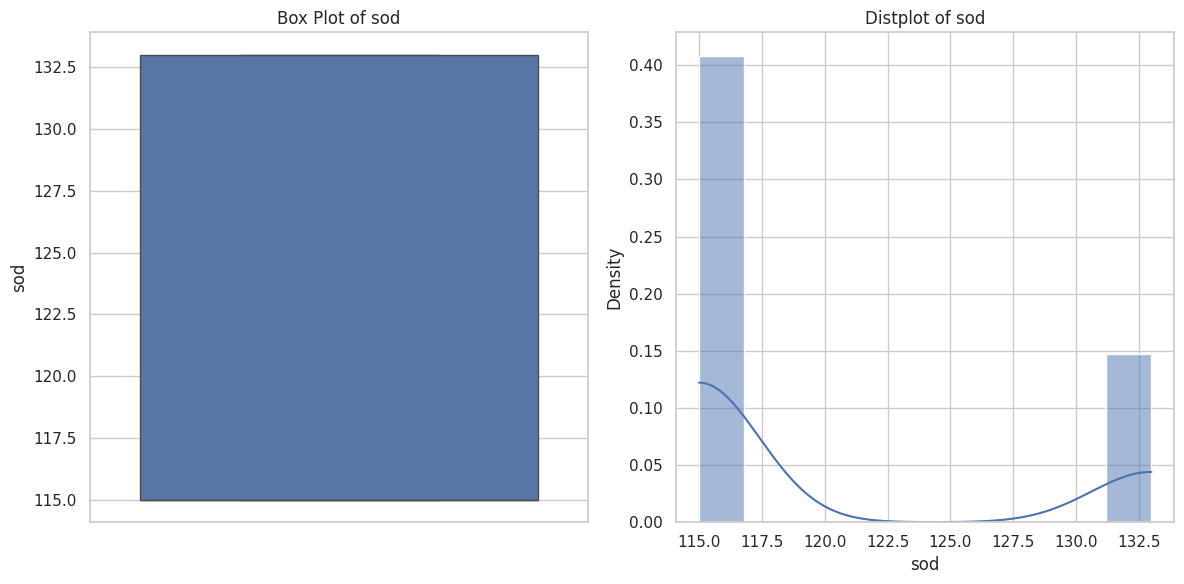

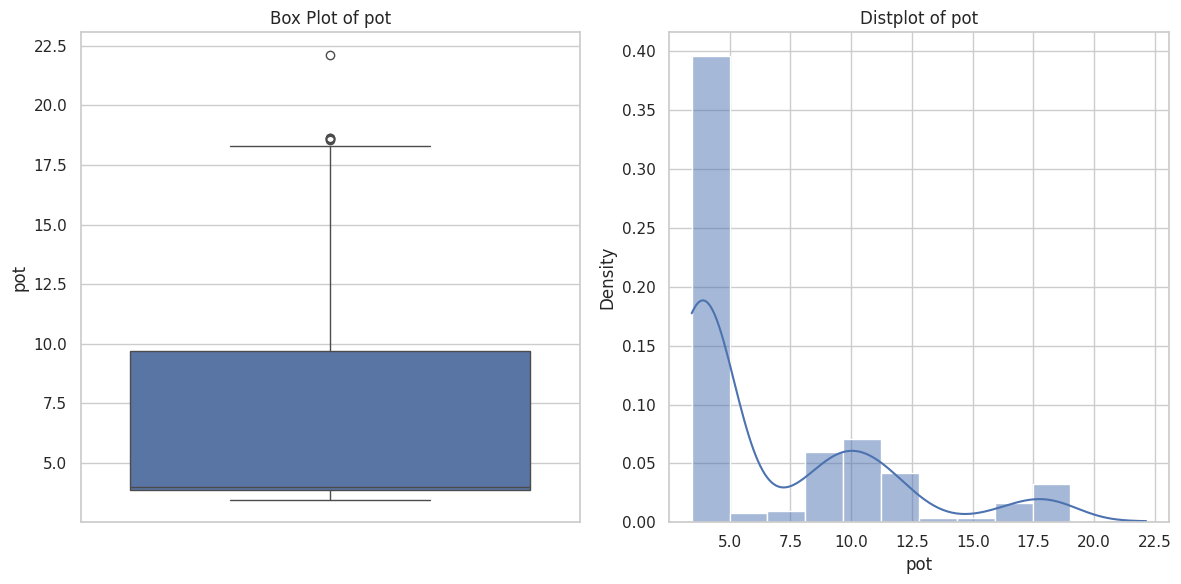

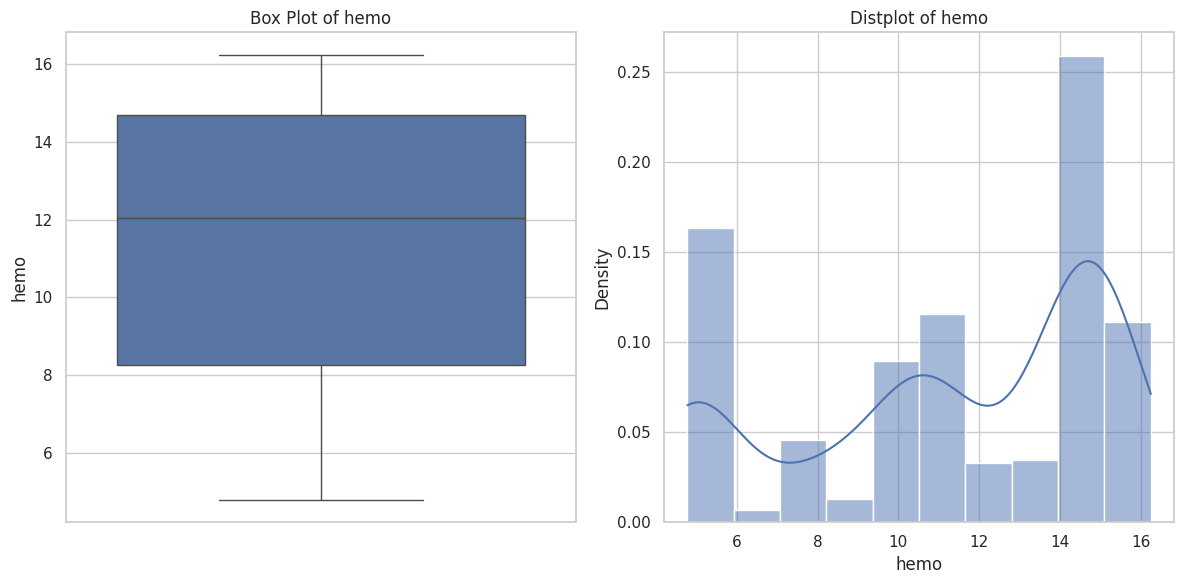

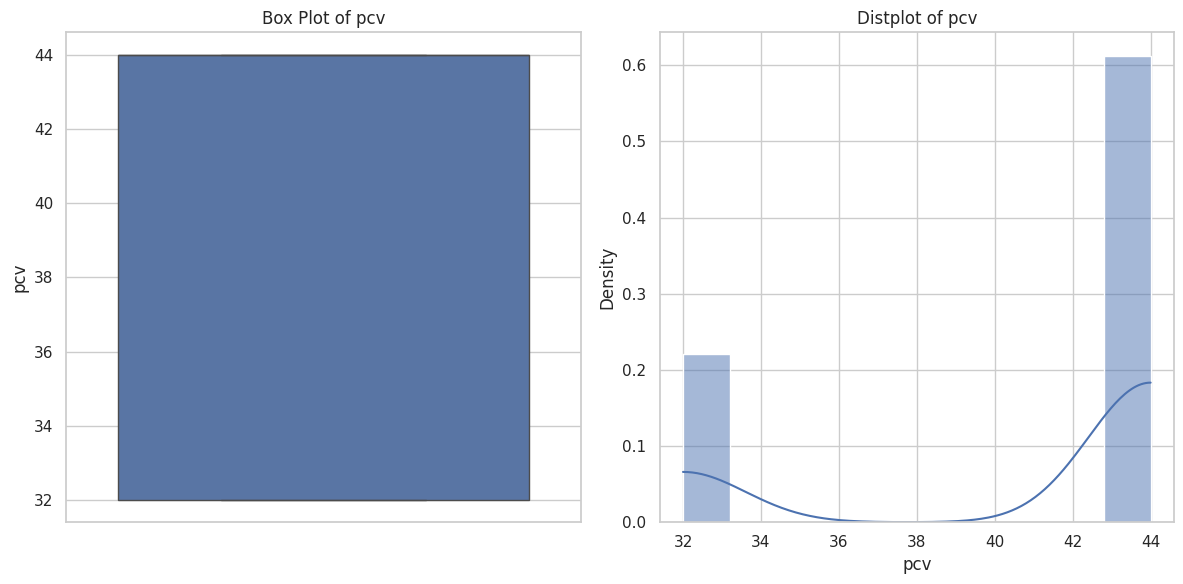

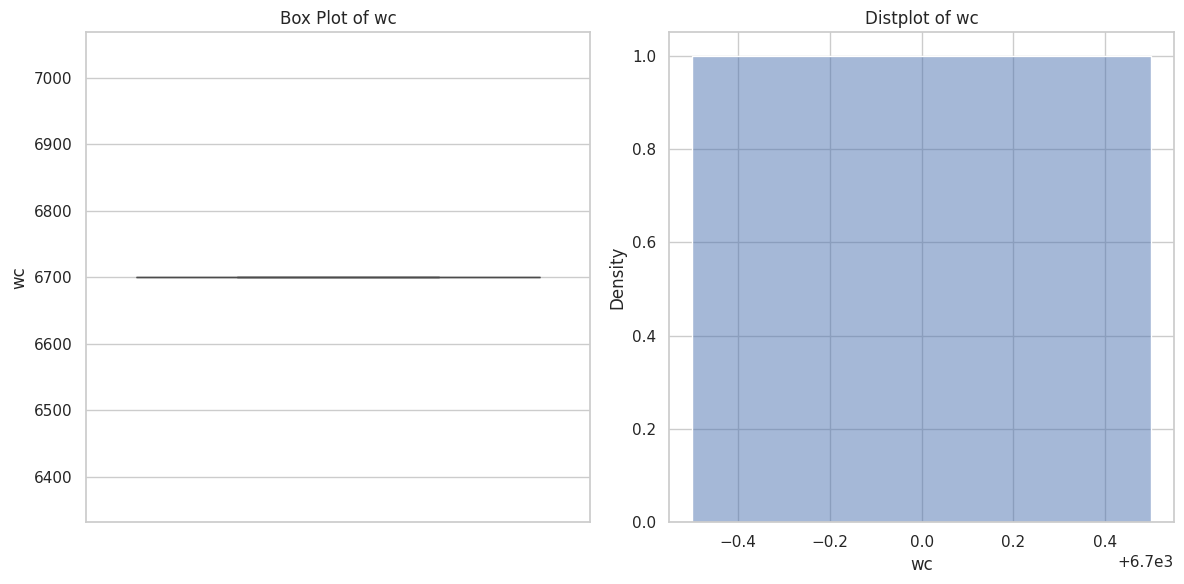

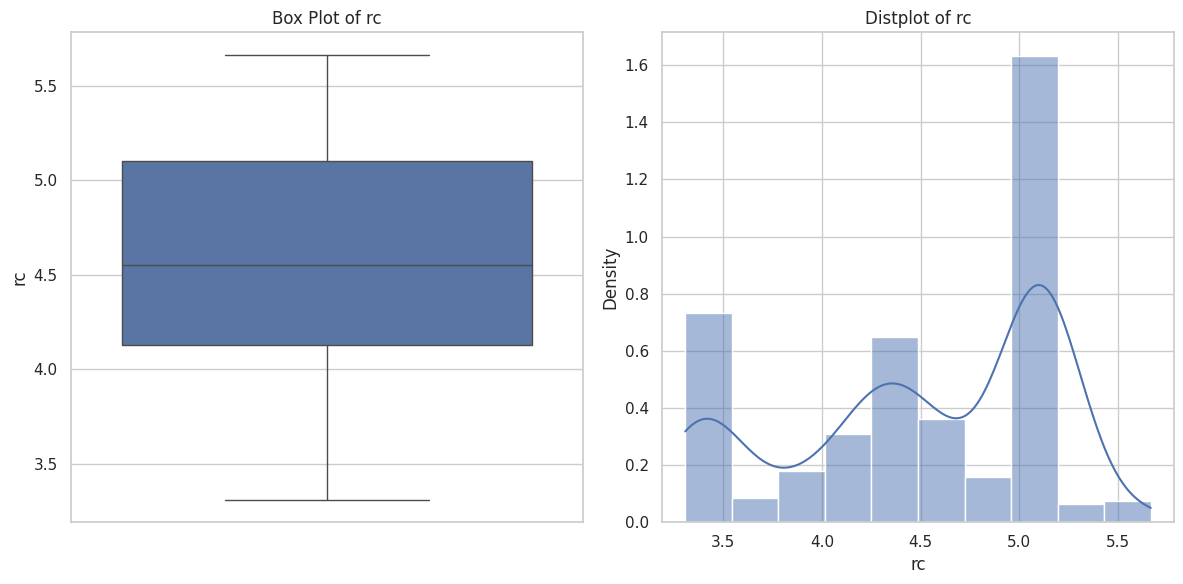

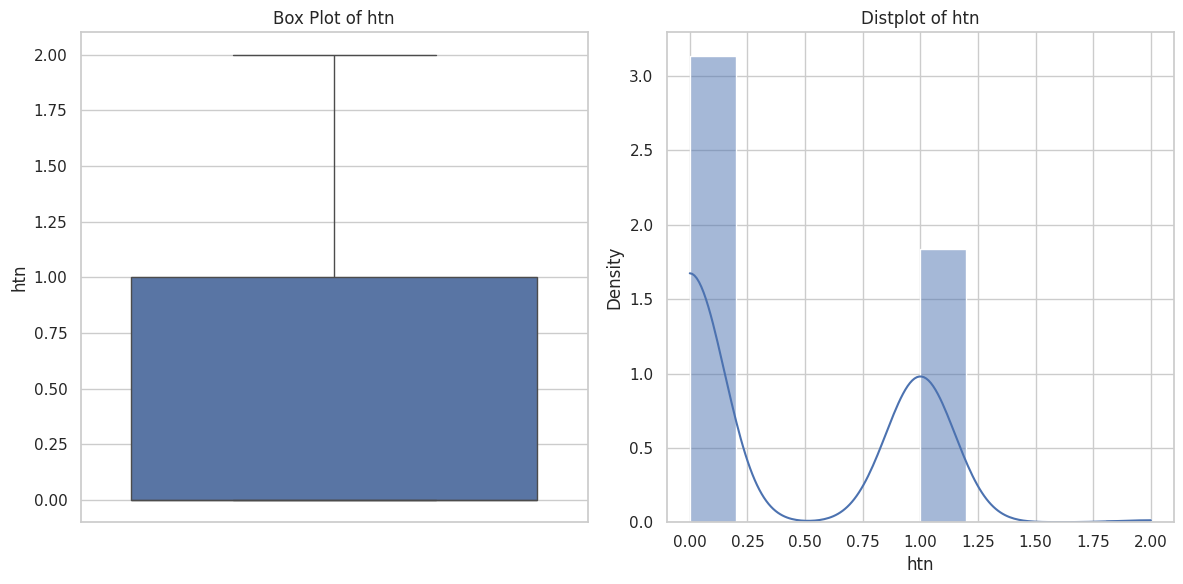

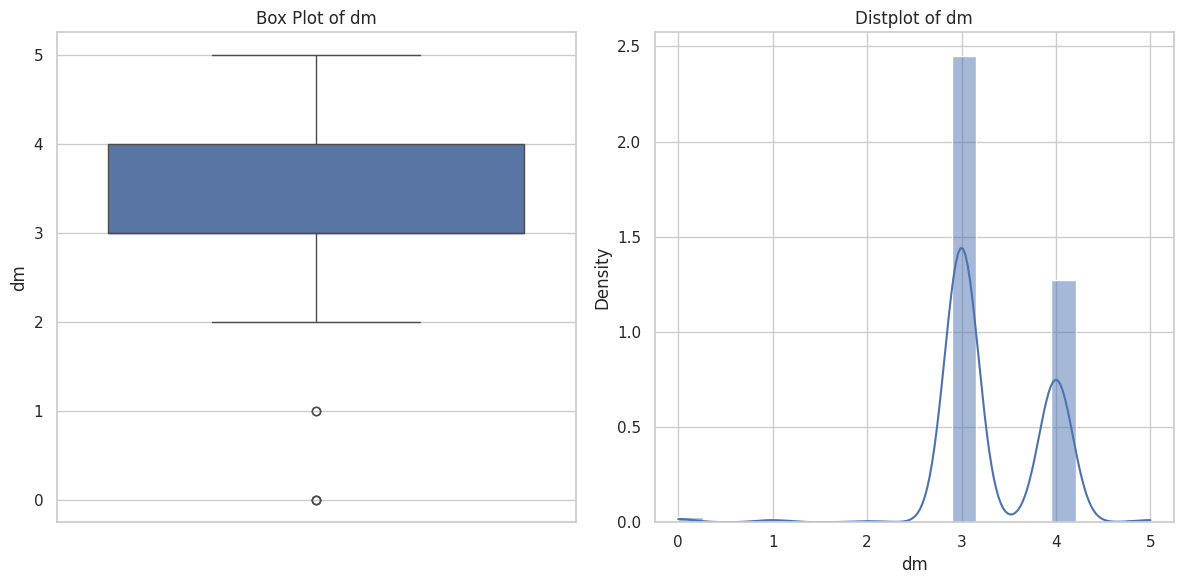

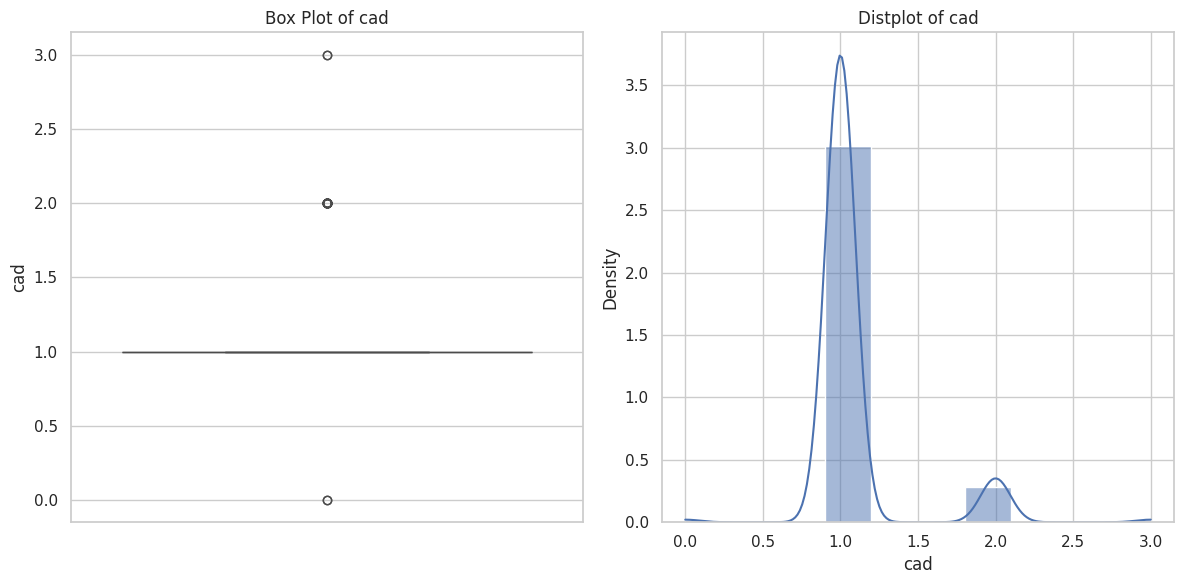

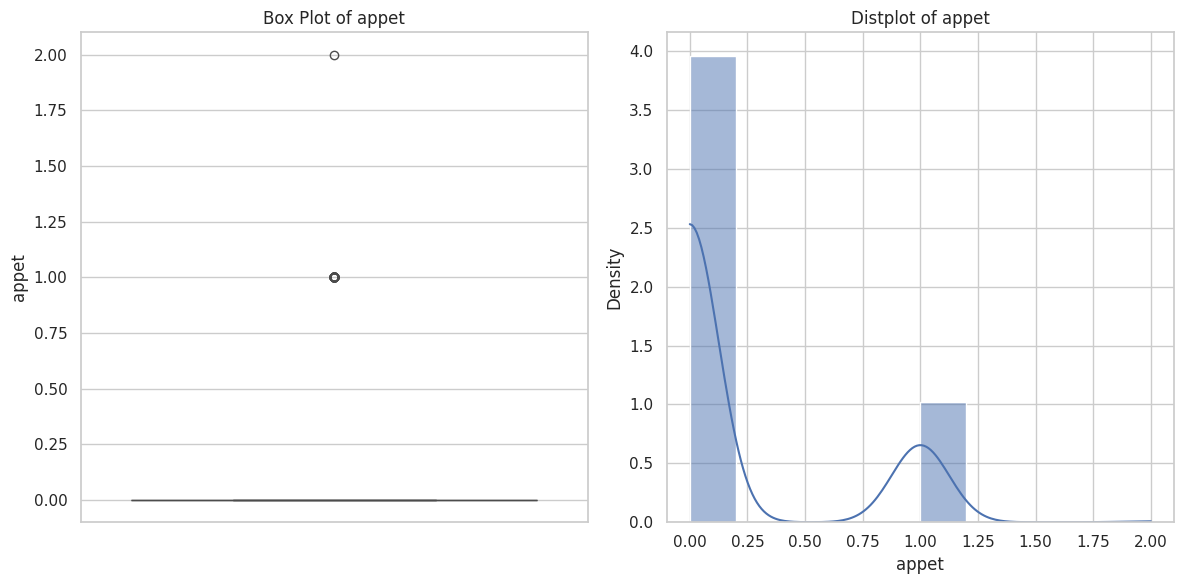

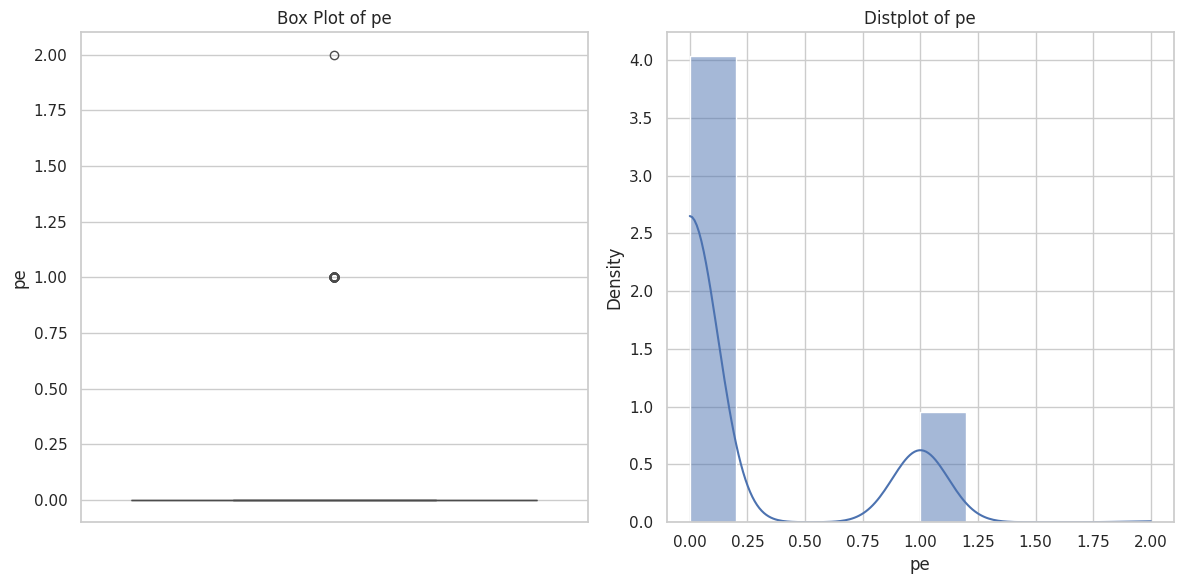

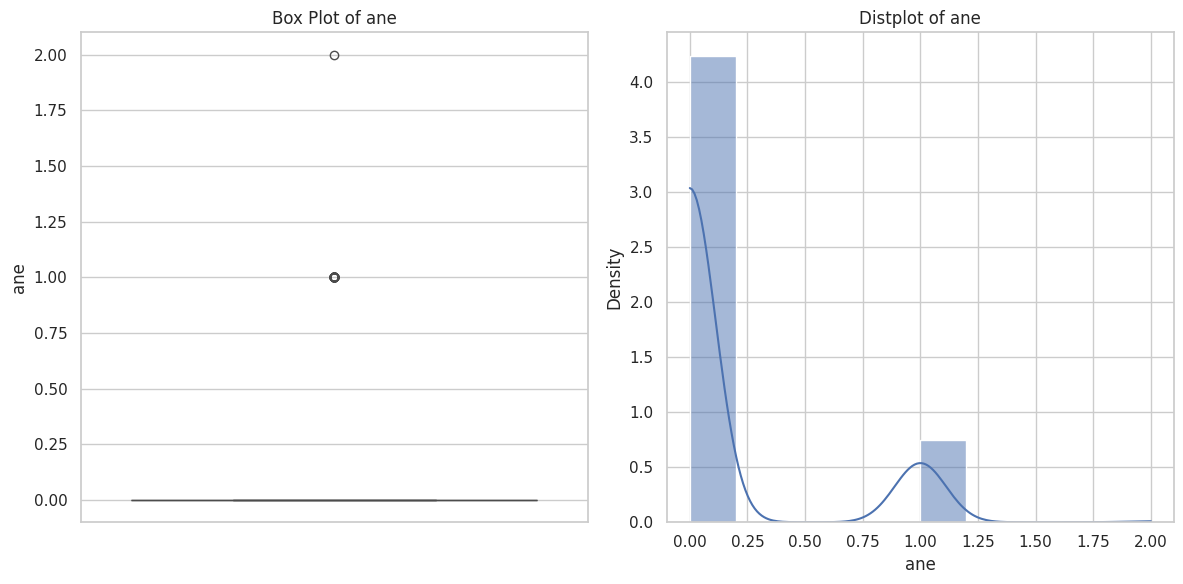

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is your DataFrame with columns and 'VirusDetected' as one of the columns

# Set seaborn style
sns.set(style="whitegrid")

# Loop through each column
for col in df.columns:
    if col != 'classification':
        plt.figure(figsize=(12, 6))

        # Box plot
        plt.subplot(1, 2, 1)
        sns.boxplot(y=df[col])
        plt.title(f'Box Plot of {col}')

        # Distribution plot (Distplot)
        plt.subplot(1, 2, 2)
        sns.histplot(df[col], kde=True, stat="density")
        plt.title(f'Distplot of {col}')

        plt.tight_layout()
        plt.show()


In [ ]:
# prompt: unique values in classification

df['classification'].unique()


array([0, 1])

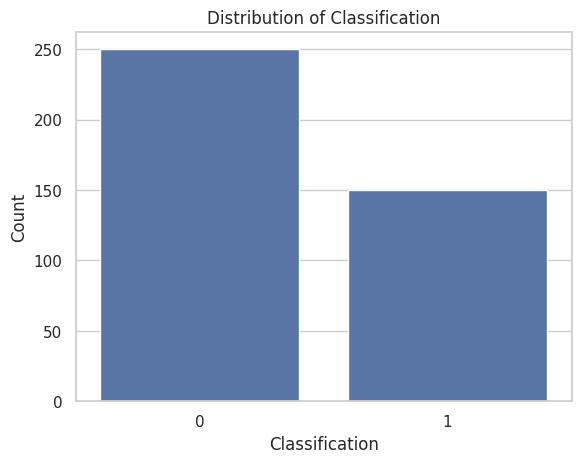

In [ ]:
# prompt: histogram of classification

import matplotlib.pyplot as plt
sns.countplot(x='classification', data=df)
plt.title('Distribution of Classification')
plt.xlabel('Classification')
plt.ylabel('Count')
plt.show()


Here we use SMOTE to balance class

In [ ]:
!pip install imbalanced-learn


In [ ]:
from imblearn.over_sampling import SMOTE

# Features and target
X = df.drop(columns=['classification'])
y = df['classification']

# Applying SMote
smote = SMOTE(k_neighbors=5, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Creating a new DataFrame with resampled data
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['classification'] = y_resampled

# Displaying the resampled DataFrame


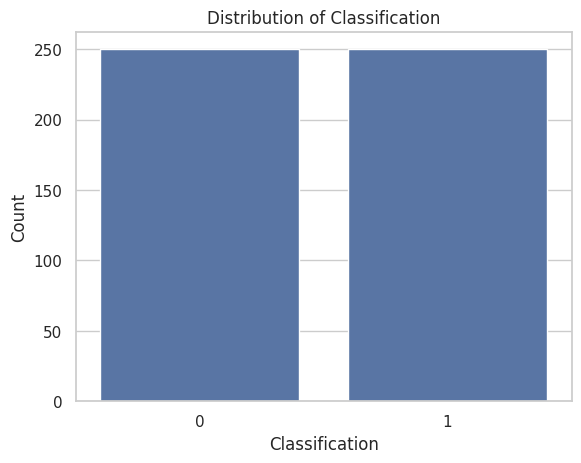

In [ ]:
# prompt: histogram of classification

import matplotlib.pyplot as plt
sns.countplot(x='classification', data=df_resampled)
plt.title('Distribution of Classification')
plt.xlabel('Classification')
plt.ylabel('Count')
plt.show()


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Sample dataframe

# Features and target
X = df.drop(columns=['classification'])
y = df['classification']

# Logistic Regression model
model = LogisticRegression()

# Recursive Feature Elimination
rfe = RFE(model, n_features_to_select=7)
fit = rfe.fit(X, y)

# Selected features
selected_features = X.columns[fit.support_]
df_selected = df[selected_features]




In [ ]:
print("Selected features:")
print(selected_features)

Selected features:
Index(['rbc', 'pc', 'sc', 'rc', 'htn', 'dm', 'appet'], dtype='object')


In [ ]:
x = df_selected
y = df['classification']

In [ ]:

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected features
x_normalized = scaler.fit_transform(x)

# Create a new DataFrame with normalized features
df_normalized = pd.DataFrame(x_normalized, columns=df_selected.columns)

# Display the normalized DataFrame
print(df_normalized)


     rbc   pc   sc   rc  htn   dm  appet
0   1.00 0.50 0.42 0.67 0.50 0.80   0.00
1   1.00 0.50 0.43 0.87 0.00 0.60   0.00
2   0.50 0.50 0.34 0.40 0.00 0.80   0.50
3   0.50 0.00 0.46 0.54 0.50 0.60   0.50
4   0.50 0.50 0.36 0.49 0.00 0.60   0.00
..   ...  ...  ...  ...  ...  ...    ...
395 0.50 0.50 0.01 0.75 0.00 0.60   0.00
396 0.50 0.50 0.05 0.78 0.00 0.60   0.00
397 0.50 0.50 0.04 0.77 0.00 0.60   0.00
398 0.50 0.50 0.03 0.78 0.00 0.60   0.00
399 0.50 0.50 0.05 0.79 0.00 0.60   0.00

[400 rows x 7 columns]


In [ ]:
x = df_normalized
y = df['classification']

In [ ]:
# prompt: df_filtered apply all ML algorothmns

# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# Train different machine learning models
import lazypredict
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)


100%|██████████| 29/29 [00:02<00:00, 10.19it/s]

[LightGBM] [Info] Number of positive: 122, number of negative: 198
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000146 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 233
[LightGBM] [Info] Number of data points in the train set: 320, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381250 -> initscore=-0.484246
[LightGBM] [Info] Start training from score -0.484246
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 